### Prosper Loan Data
Peer-to-peer (P2P) lending enables individuals to obtain loans directly from other individuals, cutting out the financial institution as the middleman.The project's objective is to leverage real-world data from Prosper to analyze and visualize the factors influencing variations in loan interest rates across diverse borrower groups within this emerging alternative financial service.


Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than $23 billion in loans to more than 1,400,000 people.
Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan. Individuals and institutions can invest in the loans and earn attractive return

In [44]:
# Import all packages to be used in our analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#to not colapse columns wen viewing data
pd.set_option("display.max_columns", None)

In [2]:
loan_data = pd.read_csv("D:/Technocolab/prosperLoanData.csv")

In [3]:
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

As we have 81 features, and analysis of all them is not realistic. We will select only those that are most relevant to our analysis. Also alot of data points with missing values and outliers so deal with the accordingly.
The dataset encompasses a diverse array of variables, encompassing both numerical and categorical types. These attributes encompass a wide range of information, including details about the borrowers themselves (such as homeownership status) as well as characteristics specific to the loans (such as terms and status).

In [4]:
loan_data.shape

(113937, 81)

In [ ]:
# [col for col in loan_data.columns if loan_data[col].dtype == '']

#### Dealing with duplicates:
Redundancy check is crucial, it can skew analysis and modeling results. so we check for any duplicate entries and will drop them.
In this dataset there are multiple loan identifiers, will check if they return identical entries or different. 

We will check for duplicates via different loan identifiers columns i.e. ListingKey, ListingNumber and LoanKey.

In [5]:
#first
loan_data.ListingKey.nunique()

113066

In [6]:
#Second
loan_data.ListingNumber.nunique()

113066

In [7]:
# third
loan_data.LoanKey.nunique()

113066

All the columns are returning same number of unique entries, lets findout duplicate entries in these loan identifiers to verify weather they are returning same duplicate entries or not


In [8]:
loan_data[loan_data['ListingKey'].duplicated() == True].count()['ListingKey']

871

In [9]:
# loan_data[loan_data.ListingKey.duplicated() == True].count()['ListingKey']
# loan_data[loan_data.ListingNumber.duplicated() == True].count()['LoanKey']
# loan_data[loan_data.LoanKey.duplicated() == True].count()['ListingNumber']

In [10]:
result = loan_data[loan_data['ListingKey'].duplicated()].shape[0], loan_data[loan_data['ListingNumber'].duplicated()].shape[0], loan_data[loan_data['LoanKey'].duplicated()].shape[0]
result

(871, 871, 871)

As all of loan identifiers gives us same number of duplicate entries so drop them by subsetting any of these identifiers. 

In [11]:
loan_data.drop_duplicates(subset='LoanKey', inplace=True)

In [12]:
# We recheck for duplicates
loan_data.duplicated().sum()

0

### Analyzing the Features:
We will meticulously analyze each significant feature within the dataset.My main focus is on finding predictor variables for interest rates (BorrowerRate). So I will first take a look at this column.

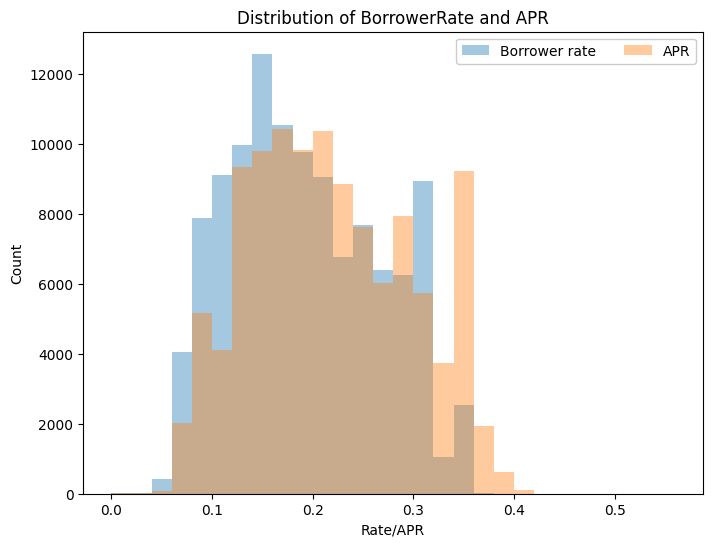

In [13]:
# Borrower rate (and borrower APR) distribution
fig = plt.figure(figsize=(8, 6))
# base_color_rate = sb.color_palette()[0]
# base_color_apr = sb.color_palette()[3]
bins_rate = np.arange(0, loan_data.BorrowerRate.max()+0.05, 0.02)
bins_apr = np.arange(0, loan_data.BorrowerAPR.max()+0.05, 0.02)
plt.hist(data=loan_data, x='BorrowerRate', alpha=0.4, bins=bins_rate);
plt.hist(data=loan_data, x='BorrowerAPR', alpha=0.4, bins=bins_apr);
plt.legend(loc=1, ncol=2, framealpha=1, labels=['Borrower rate', 'APR']);
plt.xlabel('Rate/APR');
plt.ylabel('Count');
plt.title('Distribution of BorrowerRate and APR');
plt.show()

### 1. Feature Selection:
We are dealing with a loan database of over 113k loans with 81 variables. To be able to do a meaningful analysis, we had to select a subset of these variables.
We will filter te data and select only those features that are important for our further analysis i.e. our loan and borrower indicators.

#####  - Main Features for our analysis:
The supporting features of interest are the loan characteristics on the one hand, such as the loan amount, the date when the loan was taken, the term of the loan, the status of the loan, and some borrower characteristics on the other hand, such as the income, the employment and housing situation and debt to income ration of the borrower.

In [14]:
new_loan_data = loan_data[['LoanKey', 'LoanOriginationDate', 'ClosedDate', 'LoanStatus', 'Term', 'LoanOriginalAmount', 'MonthlyLoanPayment',\
              'ListingCategory (numeric)', 'BorrowerAPR', 'BorrowerRate', \
              'CreditGrade', 'ProsperRating (Alpha)', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',\
              'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'EmploymentStatus',\
              'IsBorrowerHomeowner', 'ProsperScore', 'LenderYield']]

#### Shortlisted Features and their description
- LoanKey: Unique key for each loan.

- LoanOriginationDate: The Date loan was originated

- ClosedDate: Closed date is applicablle for cancelled, completed, chargedoff and defaulted loan statuses

- LoanStatus: The current status of loan i.e. cancelled, completed, chargedoff, defaulted, current, final payment in progress, past due. The past due status is accompanied by the delinquency bucket.

- Term: The length of loan expressed in months.
- LoanOriginalAmount: The origination amount of loan.
- MonthlyLoanPayment: The scheduled monthly loan payment.
- ListingCategory (numeric): The category of listing that borrower selected when posting their listing.
- BorrowerAPR: The borrower's annual percentage rate (APR) for the loan.
- BorrowerRate: The borrower's interest rate for the loan
- CreditGrade: The credit rate that was assigned at the time of listing went live pre-2009.
- ProsperRating (Alpha): The credit rate that was assigned at the time of listing went live post-2009.
- CreditScoreRangeLower: The lower value representing borrowers credit as provided by a consumer credit rating agency.
- CreditScoreRangeUpper: The upper value representing borrowers credit as provided by a consumer credit rating agency.
- IncomeRange: The income range of borrower at the time listing was created.
- IncomeVerifiable: The borrower indicated they have required documentation to support their income.
- StatedMonthlyIncome: The monthly income borrower stated at the time listing was created.
- DebtToIncomeRatio: The debt to income ratio of the borrower stated at the time the credit profile was pulled.
- EmploymentStatus: The employment status of borrower at the time they posted the listing
- IsBorrowerHomeowner: A borrower will be classified as homeowner if they have mortage on their credit profile or provide documentation confirming they are home owner.
- ProsperScore: A custom risk score built using built using historical prosper data. Score ranges from  1-10, with 10 least risk score.

### 2. Data Preprocessing and Cleaning:
#### - Data Labelling:
Rename some of column names into more descriptive form

In [15]:
new_loan_data = new_loan_data.rename(columns={'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'})

#### - Handling missing values:

In [16]:
# check columns that contains missing values
new_loan_data.isnull().sum()[new_loan_data.isnull().sum()>0]

ClosedDate               57990
BorrowerAPR                 25
CreditGrade              84113
ProsperRating            29084
CreditScoreRangeLower      591
CreditScoreRangeUpper      591
DebtToIncomeRatio         8472
EmploymentStatus          2255
ProsperScore             29084
dtype: int64

In [17]:
new_loan_data.ProsperScore.value_counts()

4.0     12443
6.0     12161
8.0     11953
7.0     10489
5.0      9732
3.0      7565
9.0      6865
2.0      5706
10.0     4691
11.0     1431
1.0       946
Name: ProsperScore, dtype: int64

#### - ClosedDate
for this particular column, these null values are nothing but the status of those borrowers whose payments are in progress, so can't do anthing about it.
#### - DebtToIncomeRatio 
For this column, the value is Null if the debt to income ratio is not available.so can't do anthing to it. We leave it untouched.
#### - EmploymentStatus 
For this column we can impute NaN value with "Not provided"

#### - Other Columns:
In cases of other columns with NaN values, as majority of these columns contains a large number of NaN i.e. more than 20k datapoints with NaN, so imputing them with any values could be problematic for our analysis again we will leave them untouched.

In [18]:
#EmploymentStatus
new_loan_data['EmploymentStatus'] = new_loan_data['EmploymentStatus'].fillna("Not available")
new_loan_data['EmploymentStatus'].value_counts()

Employed         66598
Full-time        26354
Not available     7602
Self-employed     6052
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

#### - Data Imputing 
The value of prosperous score should not be greater than 10.


In [19]:
new_loan_data[new_loan_data['ProsperScore'] >=11.0].count()['ProsperScore']

1431

We have 1454 instances where ProsperScore > 11.0, so inorder to avoid problematic analysis due to these data points, we will impute them, first we will plot a histogram to check what is the data distribution for this particular column is like.

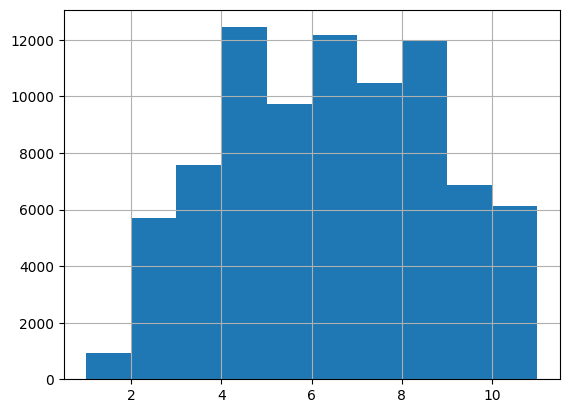

In [20]:
new_loan_data['ProsperScore'].hist()
plt.show()

Data is almost normally distributed, if in case data was skewed or had outliers we would have avoided to impute data with mean because mean is sensitive to outliers(we would have imputed it with median), but as data is normally distributed we will go with mean.

In [21]:
mean_value = new_loan_data['ProsperScore'].mean()
# Replace values >= 11.0 with the mean
new_loan_data['ProsperScore'] = new_loan_data['ProsperScore'].apply(lambda x: mean_value if x>=11.0 else x)
new_loan_data['ProsperScore'].value_counts()

4.000000     12443
6.000000     12161
8.000000     11953
7.000000     10489
5.000000      9732
3.000000      7565
9.000000      6865
2.000000      5706
10.000000     4691
5.952871      1431
1.000000       946
Name: ProsperScore, dtype: int64

All the values greater than 10 are imputed by mean.

- data Imputing for "IncomeRange" column.

In [22]:
new_loan_data['IncomeRange'].value_counts()

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
Not displayed      7741
$1-24,999          7241
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

We have about 621 data points with IncomeRange equal to 0 dollars, if someone's IncomeRange is $0 that's means they are unemployed so imputing them with unemployed is better suited.

In [23]:
new_loan_data['IncomeRange'] = new_loan_data['IncomeRange'].replace({"$0" : 'Not employed'})

In [24]:
new_loan_data['IncomeRange'].value_counts()

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
Not displayed      7741
$1-24,999          7241
Not employed       1427
Name: IncomeRange, dtype: int64

In [25]:
# new_load_data.set_index('LoanKey', inplace=True)

#### - Label Encoding

In [26]:
new_loan_data['LoanStatus'].value_counts()
# new_load_data.head()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

"LoanStatus" Column contains wide range of categorical data. So, it makes sense to divide loan status further into just active and non-active loans because these are two distinct groups. To do so we can use "LoanStatus" column.

In [27]:
new_loan_data.loc[new_loan_data['ClosedDate'].isnull(), 'LoanStatusActive'] = "Active"
new_loan_data.loc[new_loan_data['ClosedDate'].notnull(), 'LoanStatusActive'] = "Not Active"
new_loan_data.LoanStatusActive.value_counts()

Active        57990
Not Active    55076
Name: LoanStatusActive, dtype: int64

Plot a pie plot to get an overview of "LoanStatusActive" column.

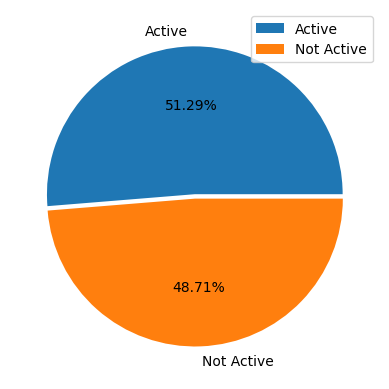

In [28]:
plt.pie(new_loan_data.LoanStatusActive.value_counts(), autopct="%0.2f%%",explode = [0.0, 0.03], labels=['Active', 'Not Active'])
plt.legend()
plt.show()

Almost 52% of borrowers have to pay their loan while almost 48% have pay back their borrowed money or are in default or have been charged off and so on and so forth.



We have to convert the loan status of borrowers into binary column, so we will apply label encoder.

In [29]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [30]:
new_loan_data['LoanStatusActive'] = le.fit_transform(new_loan_data['LoanStatusActive'])
new_loan_data.sample(10)

,LoanKey,LoanOriginationDate,ClosedDate,LoanStatus,Term,LoanOriginalAmount,MonthlyLoanPayment,ListingCategory,BorrowerAPR,BorrowerRate,CreditGrade,ProsperRating,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,DebtToIncomeRatio,EmploymentStatus,IsBorrowerHomeowner,ProsperScore,LenderYield,LoanStatusActive
14857,3767367117609564322C3E1,2012-12-31 00:00:00,2013-05-24 00:00:00,Completed,36,15000,584.25,1,0.27285,0.2346,NaN,D,780.0,799.0,"$75,000-99,999",True,7916.666667,0.33000,Employed,True,5.0,0.2246,1
82409,9E583707428024297AF7348,2014-03-12 00:00:00,NaN,Current,60,10000,266.61,1,0.22780,0.2030,NaN,D,720.0,739.0,"$75,000-99,999",True,7191.666667,0.49000,Employed,True,3.0,0.1930,0
107031,5B32368787092905023ECAC,2013-07-26 00:00:00,NaN,Current,60,10000,260.18,1,0.21566,0.1914,NaN,C,680.0,699.0,"$50,000-74,999",True,5996.666667,0.30000,Employed,False,6.0,0.1814,0
66086,936836531014670628878A5,2012-06-11 00:00:00,NaN,Current,36,3000,115.93,7,0.26681,0.2287,NaN,D,640.0,659.0,"$1-24,999",True,500.000000,1.09000,Other,False,2.0,0.2187,0
45863,A0DA365728905563262EE7C,2012-08-08 00:00:00,2013-08-26 00:00:00,Completed,36,15000,565.05,2,0.24758,0.2099,NaN,C,680.0,699.0,"$100,000+",True,16250.000000,0.15000,Employed,True,7.0,0.1999,1
98393,32FF36356317300334217DA,2011-11-17 00:00:00,NaN,Past Due (91-120 days),36,3000,130.00,6,0.35244,0.3160,NaN,E,600.0,619.0,"$50,000-74,999",True,5833.333333,0.11000,Employed,True,1.0,0.3060,0
102982,483536344503913306C7156,2011-10-28 00:00:00,2013-03-30 00:00:00,Chargedoff,36,10000,402.85,1,0.29510,0.2599,NaN,D,660.0,679.0,"$100,000+",True,19583.333333,0.12000,Employed,False,6.0,0.2499,1
22518,3E8A3587696165623AB2E03,2010-05-28 00:00:00,2011-09-27 00:00:00,Completed,36,3000,92.49,7,0.07239,0.0690,NaN,AA,800.0,819.0,"$25,000-49,999",True,2500.000000,0.12000,Full-time,True,9.0,0.0590,1
16531,44C63618738771939FB3EDF,2011-04-29 00:00:00,2011-10-29 00:00:00,Defaulted,36,6000,241.71,3,0.29510,0.2599,NaN,D,660.0,679.0,"$50,000-74,999",True,4583.333333,0.22000,Employed,False,6.0,0.2499,1
102161,E3853364501639741666E04,2006-05-09 00:00:00,2007-08-01 00:00:00,Completed,36,3000,117.70,0,0.24753,0.2400,D,NaN,600.0,619.0,Not displayed,True,1150.000000,0.19331,Not available,False,NaN,0.2250,1


In [31]:
new_loan_data

,LoanKey,LoanOriginationDate,ClosedDate,LoanStatus,Term,LoanOriginalAmount,MonthlyLoanPayment,ListingCategory,BorrowerAPR,BorrowerRate,CreditGrade,ProsperRating,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,DebtToIncomeRatio,EmploymentStatus,IsBorrowerHomeowner,ProsperScore,LenderYield,LoanStatusActive
0,E33A3400205839220442E84,2007-09-12 00:00:00,2009-08-14 00:00:00,Completed,36,9425,330.43,0,0.16516,0.1580,C,NaN,640.0,659.0,"$25,000-49,999",True,3083.333333,0.17,Self-employed,True,NaN,0.1380,1
1,9E3B37071505919926B1D82,2014-03-03 00:00:00,NaN,Current,36,10000,318.93,2,0.12016,0.0920,NaN,A,680.0,699.0,"$50,000-74,999",True,6125.000000,0.18,Employed,False,7.0,0.0820,0
2,6954337960046817851BCB2,2007-01-17 00:00:00,2009-12-17 00:00:00,Completed,36,3001,123.32,0,0.28269,0.2750,HR,NaN,480.0,499.0,Not displayed,True,2083.333333,0.06,Not available,False,NaN,0.2400,1
3,A0393664465886295619C51,2012-11-01 00:00:00,NaN,Current,36,10000,321.45,16,0.12528,0.0974,NaN,A,800.0,819.0,"$25,000-49,999",True,2875.000000,0.15,Employed,True,9.0,0.0874,0
4,A180369302188889200689E,2013-09-20 00:00:00,NaN,Current,36,15000,563.97,2,0.24614,0.2085,NaN,D,680.0,699.0,"$100,000+",True,9583.333333,0.26,Employed,True,4.0,0.1985,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,9BD7367919051593140DB62,2013-04-22 00:00:00,NaN,Current,36,10000,364.74,1,0.22354,0.1864,NaN,C,700.0,719.0,"$50,000-74,999",True,4333.333333,0.13,Employed,True,5.0,0.1764,0
113933,62D93634569816897D5A276,2011-11-07 00:00:00,NaN,FinalPaymentInProgress,36,2000,65.57,7,0.13220,0.1110,NaN,A,700.0,719.0,"$75,000-99,999",True,8041.666667,0.11,Employed,True,8.0,0.1010,0
113934,DD1A370200396006300ACA0,2013-12-23 00:00:00,NaN,Current,60,10000,273.35,1,0.23984,0.2150,NaN,D,700.0,719.0,"$25,000-49,999",True,2875.000000,0.51,Employed,True,3.0,0.2050,0
113935,589536350469116027ED11B,2011-11-21 00:00:00,2013-08-13 00:00:00,Completed,60,15000,449.55,2,0.28408,0.2605,NaN,C,680.0,699.0,"$25,000-49,999",True,3875.000000,0.48,Full-time,True,5.0,0.2505,1


LoanStatusActive: if loan is Active: 0, if Not-Active: 1

#### - Converting Data-type

We will Convert ProsperRating & IncomeRange to ordinal categorical.


In [32]:
var_dict = {'CreditGrade': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'],
           'ProsperRating': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'],
           'IncomeRange': ['Not displayed', 'Not employed', '$1-24,999', 
                           '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}
for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories = var_dict[var])
    new_loan_data[var] = new_loan_data[var].astype(ordered_var)

Adjust datatype for all other categorical columns.

In [33]:
new_loan_data['LoanStatus'] = new_loan_data['LoanStatus'].astype('category')
new_loan_data['ListingCategory'] = new_loan_data['ListingCategory'].astype('category')
new_loan_data['EmploymentStatus'] = new_loan_data['EmploymentStatus'].astype('category')
new_loan_data['LoanStatusActive'] = new_loan_data['LoanStatusActive'].astype(bool)

In [34]:
new_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   LoanKey                113066 non-null  object  
 1   LoanOriginationDate    113066 non-null  object  
 2   ClosedDate             55076 non-null   object  
 3   LoanStatus             113066 non-null  category
 4   Term                   113066 non-null  int64   
 5   LoanOriginalAmount     113066 non-null  int64   
 6   MonthlyLoanPayment     113066 non-null  float64 
 7   ListingCategory        113066 non-null  category
 8   BorrowerAPR            113041 non-null  float64 
 9   BorrowerRate           113066 non-null  float64 
 10  CreditGrade            28953 non-null   category
 11  ProsperRating          83982 non-null   category
 12  CreditScoreRangeLower  112475 non-null  float64 
 13  CreditScoreRangeUpper  112475 non-null  float64 
 14  IncomeRange         

In [36]:
categorical_feature = [col for col in new_loan_data.columns if new_loan_data[col].dtype == 'category']

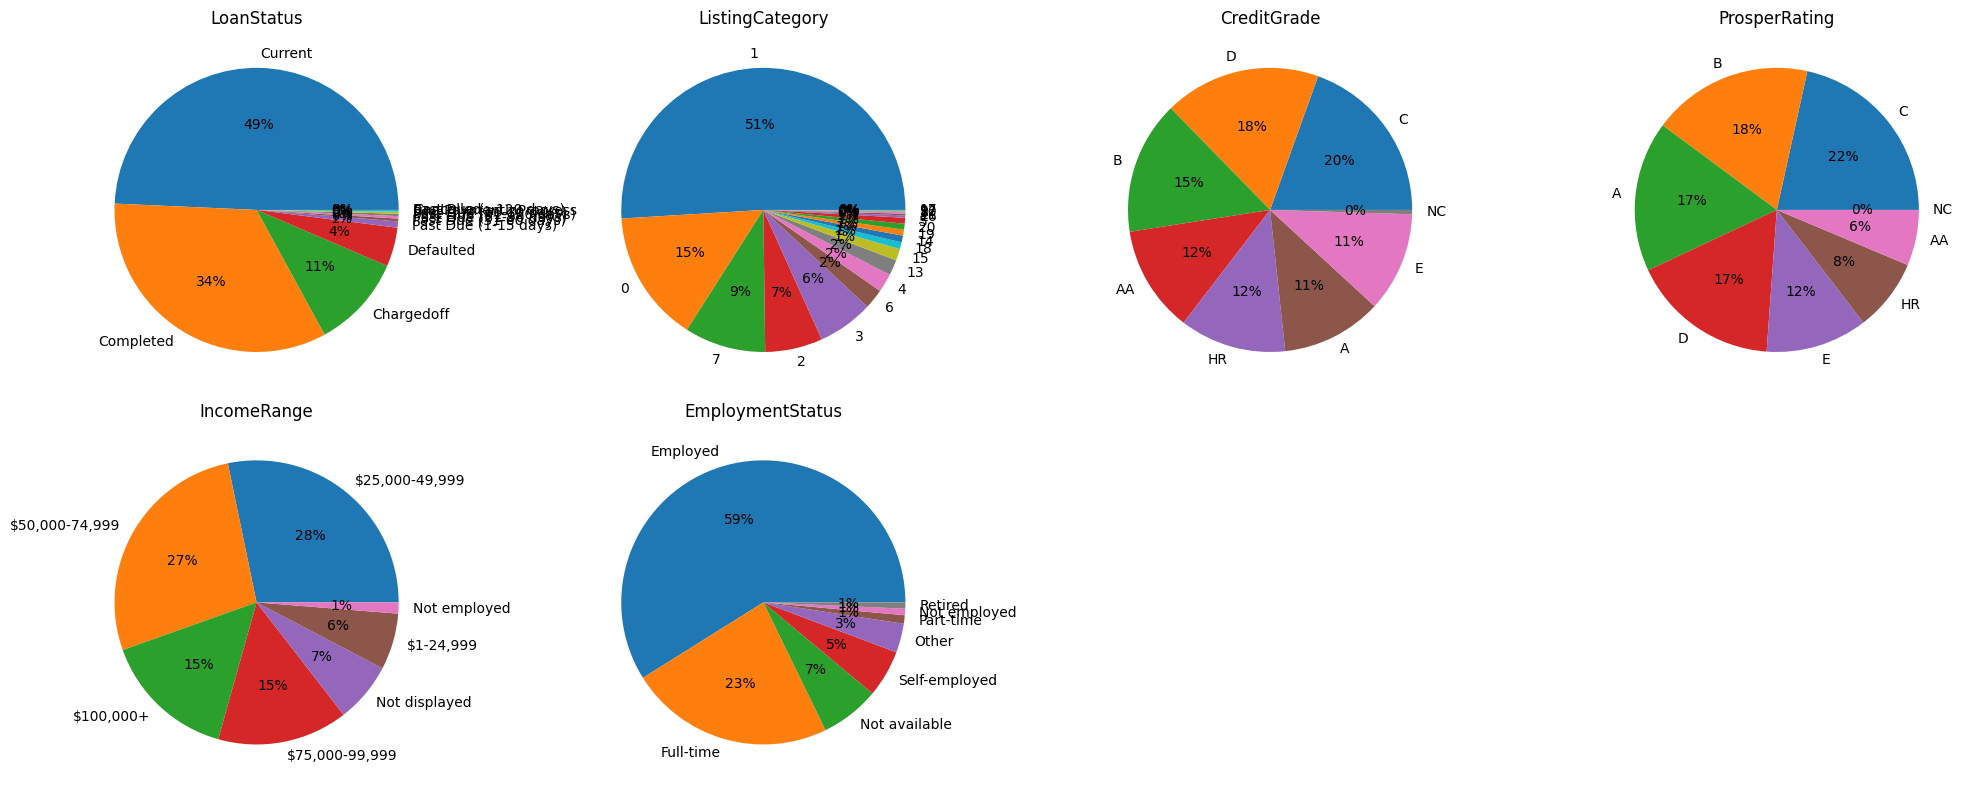

In [40]:
# Overall Categorical data distribution
plt.figure(figsize=(20,8))
for index, col in enumerate(categorical_feature, start=1):
    plt.subplot(2,4,index)
    plt.title(col)
    plt.pie(new_loan_data[col].value_counts().values,autopct='%1.0f%%', labels=new_loan_data[col].value_counts().index)
plt.tight_layout()

### Exploratory Data Analysis

#### Plot the features to get an overview
#### - Histogram
We'll create histograms to analyze features together, providing a comprehensive understanding at once.

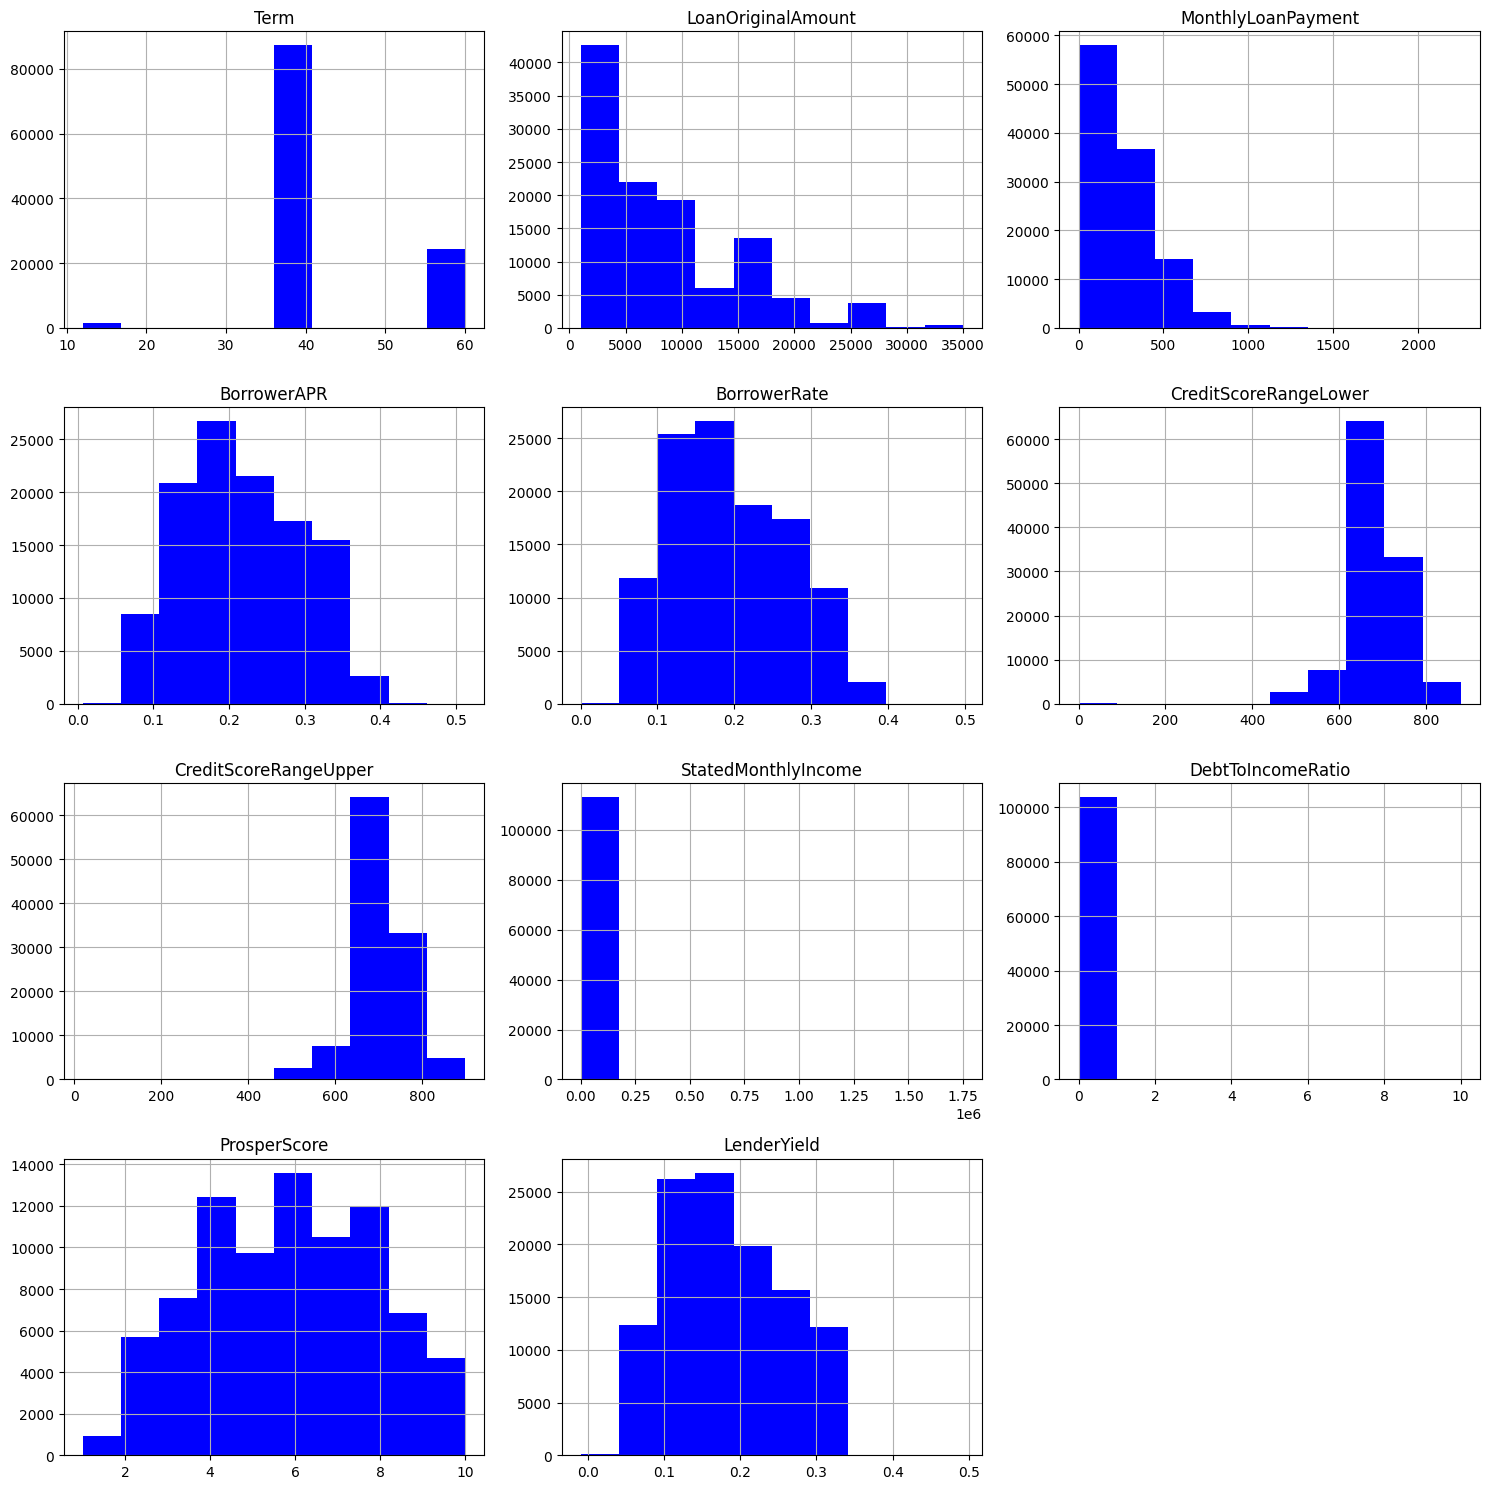

In [35]:
# Visualizing Continuous & discrete numeric variables
new_loan_data.hist(figsize=(15,15), color= 'blue')
plt.tight_layout()
plt.show()

In most of the cases data is very skewed.

In [36]:
# CreditGrade, ProsperRating, IncomeRange as ordered categorical vars
var_dict = {'CreditGrade': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'],
           'ProsperRating': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'],
           'IncomeRange': ['Not displayed', 'Not employed', '$1-24,999', 
                           '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}
for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories = var_dict[var])
    new_loan_data[var] = new_loan_data[var].astype(ordered_var)

In [37]:
new_loan_data.describe()

,Term,LoanOriginalAmount,MonthlyLoanPayment,BorrowerAPR,BorrowerRate,CreditScoreRangeLower,CreditScoreRangeUpper,StatedMonthlyIncome,DebtToIncomeRatio,ProsperScore,LenderYield
count,113066.000000,113066.000000,113066.000000,113041.000000,113066.000000,112475.000000,112475.000000,1.130660e+05,104594.000000,83982.000000,113066.000000
mean,40.800170,8314.762307,271.932742,0.218980,0.192946,685.524961,704.524961,5.605120e+03,0.276032,5.866871,0.182882
std,10.421518,6237.007841,192.549979,0.080483,0.074917,66.635895,66.635895,7.495596e+03,0.553738,2.279020,0.074612
min,12.000000,1000.000000,0.000000,0.006530,0.000000,0.000000,19.000000,0.000000e+00,0.000000,1.000000,-0.010000
25%,36.000000,4000.000000,130.950000,0.156290,0.134000,660.000000,679.000000,3.199396e+03,0.140000,4.000000,0.124500
50%,36.000000,6300.000000,217.370000,0.209840,0.184000,680.000000,699.000000,4.666667e+03,0.220000,6.000000,0.174000
75%,36.000000,12000.000000,370.570000,0.283860,0.250600,720.000000,739.000000,6.824688e+03,0.320000,8.000000,0.240600
max,60.000000,35000.000000,2251.510000,0.512290,0.497500,880.000000,899.000000,1.750003e+06,10.010000,10.000000,0.492500


### - Heatmap

In [38]:
# plt.figure(figsize = [12, 8])
# sns.heatmap(new_loan_data.corr(), cmap='YlGnBu', annot=True)
# plt.xticks(rotation = 45)
# plt.title('Correlation Between Each Variables', fontsize = 35)
# plt.show()

In [39]:
# corr_BorrowerRate = new_load_data.corrwith(new_load_data['BorrowerRate'])
# corr_BorrowerRate

### Univariate Analysis
#### 1. LoanOriginationDate

In [40]:
new_loan_data.LoanOriginationDate.describe()

count                  113066
unique                   1873
top       2013-11-13 00:00:00
freq                      469
Name: LoanOriginationDate, dtype: object

In [41]:
new_loan_data.LoanOriginationDate.min()

'2005-11-15 00:00:00'

Dataset includes loans from period 2005-2013

We will convert "LoanOriginationDate" column into datetime format and we will see data distribution i.e. which year shows highest trend of loans being originated.

In [42]:
new_loan_data['LoanOriginationDate'] = pd.to_datetime(new_loan_data['LoanOriginationDate'])

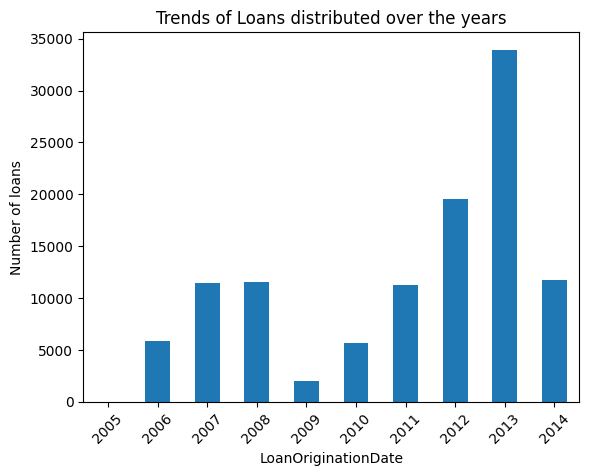

In [43]:
new_loan_data.groupby(new_loan_data.LoanOriginationDate.dt.year).count()['LoanOriginationDate'].plot(kind = 'bar')
plt.ylabel("Number of loans")
plt.title("Trends of Loans distributed over the years")
plt.xticks(rotation = 45)
plt.show()

2009 was critical year for prosper. In that year, Prosper faced significant challenges due to regulatory issues and a decrease in investor confidence.

### 2. ClosedDate
Closed date is applicable for cancelled, charged off, completed and defaulted loan statuses. We will check number of loans that are already closed.

In [44]:
new_loan_data['ClosedDate'].notnull().sum()

55076

55076 loans have been cancelled, charged off, completed, or defaulted.

Convert this column to datetime format to see which year shows highest trend of loans being closed.

In [45]:
new_loan_data['ClosedDate'] = pd.to_datetime(new_loan_data['ClosedDate'])

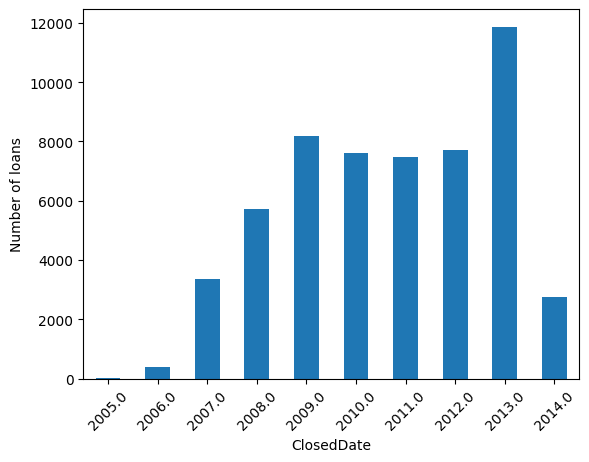

In [46]:
new_loan_data.groupby(new_loan_data.ClosedDate.dt.year).count()['LoanOriginationDate'].plot(kind = 'bar')
plt.ylabel("Number of loans")
plt.xticks(rotation = 45)
plt.show()

The number of loans closed was at its lowest in 2009 and reached its highest in 2013. This is because of several reasons:
- Economic Recovery
- Stabilization of Financial Markets
-  Increased Consumer Confidence

In [47]:
# months between loan origination and closing date
new_loan_data['MonthsToClosed'] = ((new_loan_data.ClosedDate - new_loan_data.LoanOriginationDate) / np.timedelta64(1, 'M'))

In [48]:
# total months from date of origination and to closing date.
new_loan_data['MonthsToClosed'].value_counts()

 36.008953    5068
 35.976098    2249
 11.992033     627
 12.024888     512
 6.998090      372
              ... 
 37.684552       1
 12.762542       1
 8.106618        1
 38.900183       1
-0.032855        1
Name: MonthsToClosed, Length: 1236, dtype: int64

In [49]:
new_loan_data['MonthsToClosed'].describe()

count    55076.000000
mean        19.291197
std         11.615265
min        -45.536869
25%          9.232222
50%         17.051685
75%         31.015011
max         51.155055
Name: MonthsToClosed, dtype: float64

In [50]:
# Check for any unusual data points
new_loan_data[new_loan_data['MonthsToClosed'] <0]

,LoanKey,LoanOriginationDate,ClosedDate,LoanStatus,Term,LoanOriginalAmount,MonthlyLoanPayment,ListingCategory,BorrowerAPR,BorrowerRate,CreditGrade,ProsperRating,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,DebtToIncomeRatio,EmploymentStatus,IsBorrowerHomeowner,ProsperScore,LenderYield,LoanStatusActive,MonthsToClosed
108297,5BA53702830459166F4AD14,2013-12-31,2010-03-16,Defaulted,36,2500,82.31,1,0.14206,0.1139,NaN,A,660.0,679.0,"$75,000-99,999",False,6250.000000,NaN,Self-employed,False,5.952871,0.1039,True,-45.536869
112975,BF6034334495990283E5285,2008-10-17,2008-10-16,Cancelled,36,1000,32.62,1,0.16219,0.1075,A,NaN,720.0,739.0,"$25,000-49,999",True,2444.666667,0.34,Full-time,False,NaN,0.0975,True,-0.032855


This is some error data, we have 2 loan instances with loan close dates prior to loan origination dates, we will delete these instances.

In [51]:
new_loan_data.drop(new_loan_data[new_loan_data['MonthsToClosed'] < 0].index, inplace=True)
new_loan_data.shape

(113064, 24)

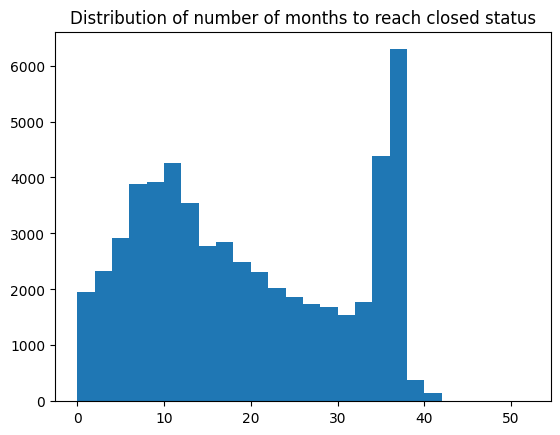

In [52]:
bins = np.arange(0, new_loan_data['MonthsToClosed'].max()+2, 2)  #np.arange(start, stop, step)
plt.hist(data = new_loan_data, x = 'MonthsToClosed', bins=bins)
plt.title('Distribution of number of months to reach closed status');

The distribution of data of "MonthsToClosed" column is bimodal, with one peak at around 12 months and another peak at around 36 months.

### 2. LoanStatusActive
We have already encoded this column into Active & NonActive

In [53]:
new_loan_data.LoanStatusActive.value_counts()

False    57990
True     55074
Name: LoanStatusActive, dtype: int64

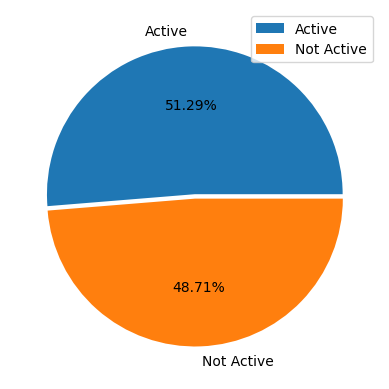

In [54]:
plt.pie(new_loan_data.LoanStatusActive.value_counts(), autopct="%0.2f%%",explode = [0.0, 0.03], labels=['Active', 'Not Active'])
plt.legend()
plt.show()

In [55]:
new_loan_data.columns

Index(['LoanKey', 'LoanOriginationDate', 'ClosedDate', 'LoanStatus', 'Term',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'ListingCategory',
       'BorrowerAPR', 'BorrowerRate', 'CreditGrade', 'ProsperRating',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'IncomeRange',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'DebtToIncomeRatio',
       'EmploymentStatus', 'IsBorrowerHomeowner', 'ProsperScore',
       'LenderYield', 'LoanStatusActive', 'MonthsToClosed'],
      dtype='object')

In [56]:
new_loan_data['LoanStatus'].value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5017
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     4
Name: LoanStatus, dtype: int64

#### LoanStatusActive:
We will explore data distribution for Active and Non-Active loans and will see what the trends are like.

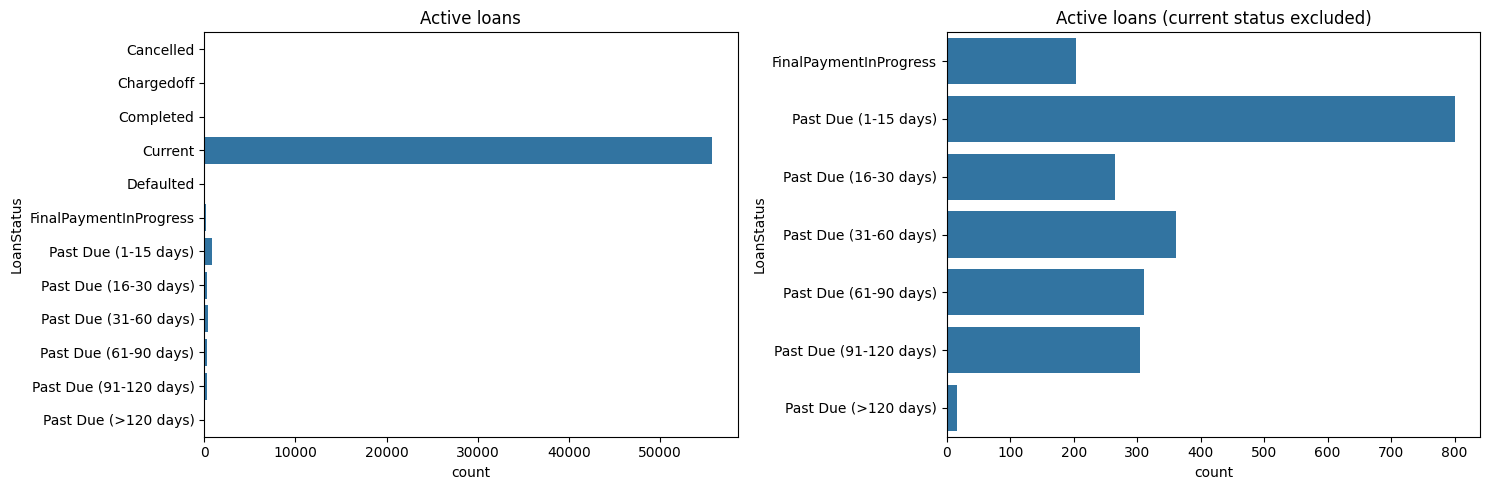

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

# set base color for plots
base_color = sns.color_palette()[0]
# plotting for active loans
sns.countplot(data = new_loan_data[new_loan_data.LoanStatusActive == 0], y = 'LoanStatus', color = base_color, orient = 'h')
plt.xticks(rotation = 0)
plt.title('Active loans')

plt.subplot(1,2,2)
order = ['FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)', \
         'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']
sns.countplot(data = new_loan_data[new_loan_data.LoanStatus.isin(order)], y = 'LoanStatus', order = order, color = base_color, orient = 'h')
plt.xticks(rotation = 0)
plt.title('Active loans (current status excluded)')
plt.tight_layout();

Among active loans, the vast majority are loans without any issue, i.e. in "current" status.

Among active loans not in the current status, the highest amount is in default for 1-15 days.

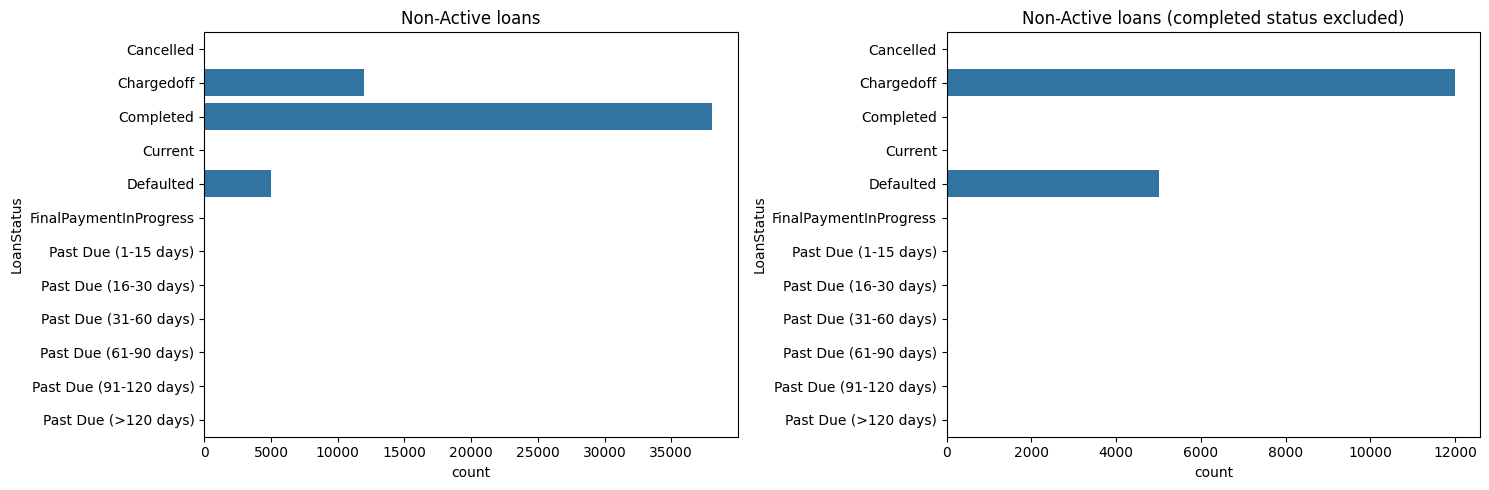

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = new_loan_data[new_loan_data.LoanStatusActive == 1], y = 'LoanStatus', color = base_color, orient = 'h')
plt.xticks(rotation = 0)
plt.title('Non-Active loans')

plt.subplot(1,2,2)
# sns.countplot(data = new_load_data[new_load_data.LoanStatus.isin(['Defaulted', 'Chargedoff', 'Cancelled'])], y = 'LoanStatus', \
#              color = base_color)
filtered_data = new_loan_data[new_loan_data['LoanStatus'].isin(['Defaulted', 'Chargedoff', 'Cancelled'])]
sns.countplot(data=filtered_data, y='LoanStatus', color=base_color)
plt.xticks(rotation = 0)
plt.title('Non-Active loans (completed status excluded)')
plt.tight_layout();

Most non-active loans are in "completed" status, i.e. fully repaid.

In the not-repaid group of non-active loans, there are more charged off loans (i.e. those were the chance of repayment is minimal) than defaulted ones.

Among not-paid loans charged off is most frequent, lets explore what percent of borrowers belongs to charged off loans.

In [59]:
new_loan_data[new_loan_data.LoanStatus == 'Chargedoff'].count()['LoanStatus']/ len(new_loan_data)

0.10606382225995896

10% borrowers are those who are been charged off.

In [60]:
new_loan_data['LoanStatus'].value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5017
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     4
Name: LoanStatus, dtype: int64

#### Term

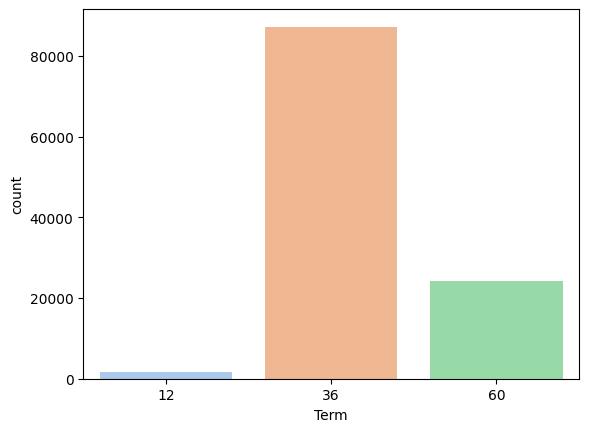

In [61]:
sns.countplot(data=new_loan_data, x = 'Term', palette= 'pastel')
plt.show()

Majority of borrowers have loan term of 36 months.

In [62]:
new_loan_data.columns

Index(['LoanKey', 'LoanOriginationDate', 'ClosedDate', 'LoanStatus', 'Term',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'ListingCategory',
       'BorrowerAPR', 'BorrowerRate', 'CreditGrade', 'ProsperRating',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'IncomeRange',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'DebtToIncomeRatio',
       'EmploymentStatus', 'IsBorrowerHomeowner', 'ProsperScore',
       'LenderYield', 'LoanStatusActive', 'MonthsToClosed'],
      dtype='object')

### LoanOriginalAmount

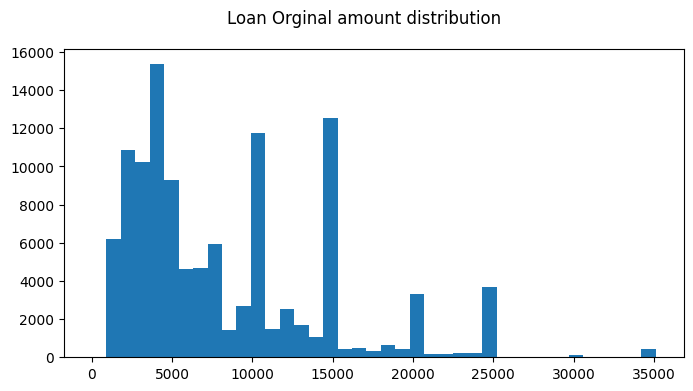

In [63]:
plt.figure(figsize=(8,4))
plt.suptitle("Loan Orginal amount distribution")
# plt.subplot(1,2,1)
bins = np.arange(0, new_loan_data['LoanOriginalAmount'].max()+900, 900)
plt.hist(data=new_loan_data, x = 'LoanOriginalAmount', bins=bins)
plt.show()

#### ListingCategory

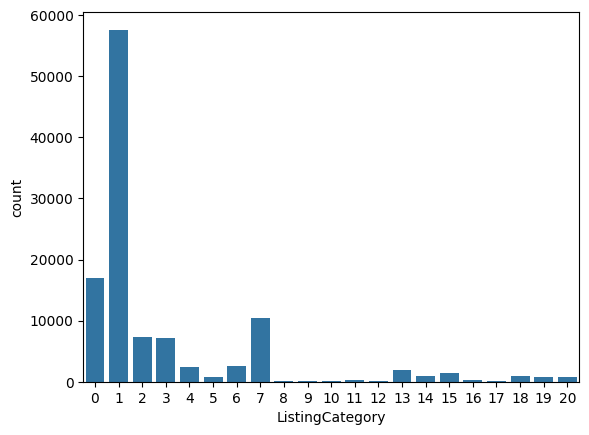

In [64]:
sns.countplot(data=new_loan_data, x = 'ListingCategory', color=base_color)
plt.show()

Majority of borrowers opted for debt consolidation.

#### CreditGrade and ProsperRating

Above both columns belong together because both shows the credit ratings of borrowers for pre-2009 and later after july 2009.

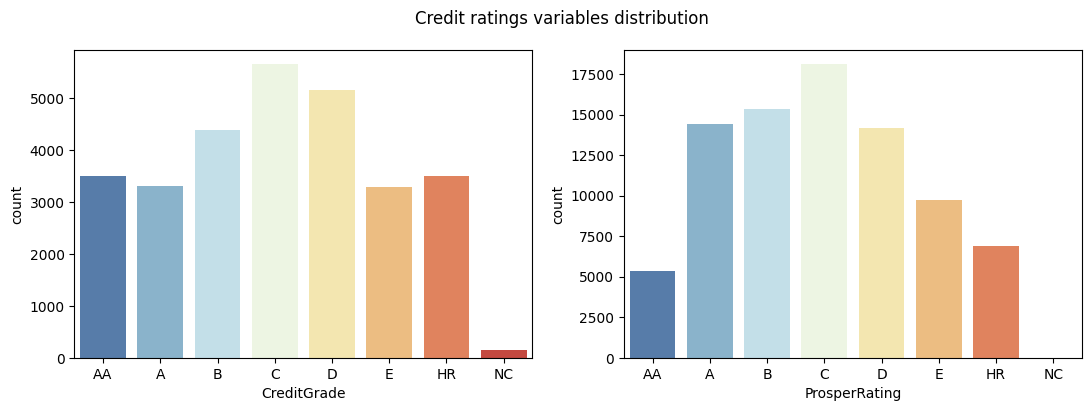

In [65]:
plt.figure(figsize=(13,4))
plt.suptitle("Credit ratings variables distribution")
plt.subplot(1,2,1)
sns.countplot(data=new_loan_data, x = 'CreditGrade', palette= "RdYlBu_r")

plt.subplot(1,2,2)
sns.countplot(data=new_loan_data, x =  'ProsperRating', palette="RdYlBu_r")
plt.show()

There are fewer borrowers with CreditGrade because it was only used until 2009, since then ProsperRating is used.

### IncomeRange

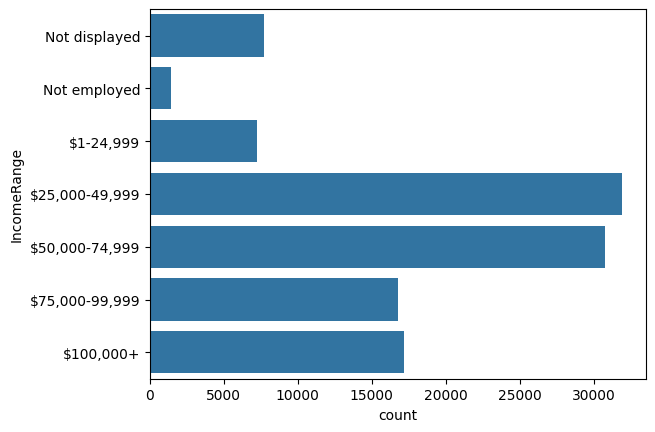

In [66]:
sns.countplot(data=new_loan_data, y = 'IncomeRange', color=base_color)
plt.show()

We can see two large groups in the loans: mid earners on the one hand (25k - 75k) making the majority of loans, and high earners group (75k+) on the other.

### IncomeVerifiable

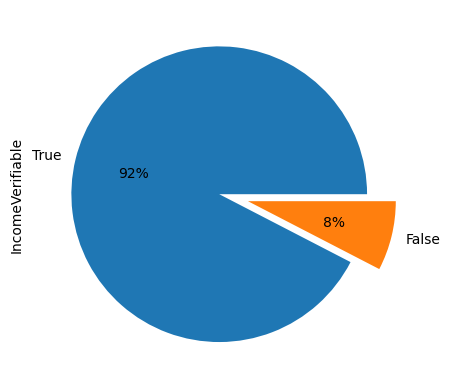

In [67]:
new_loan_data.IncomeVerifiable.value_counts().plot(kind='pie', autopct='%1.0f%%', explode = [0.0, 0.2]);

Majority of borrowers have a verifiable income.

### StatedMonthlyIncome

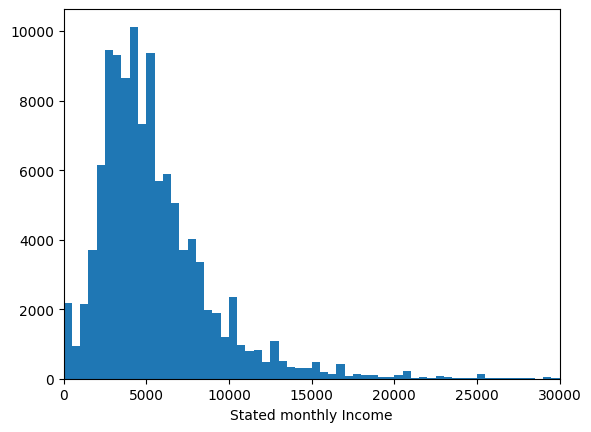

In [68]:
bins = np.arange(0, 30500, 500)
plt.hist(data=new_loan_data, x = 'StatedMonthlyIncome', bins=bins)
plt.xlabel("Stated monthly Income")
plt.xlim(0, 30000)
plt.show()

Monthly Income is right skewed. We will apply log transformation 

Below resulting array will contain a sequence of numbers that are exponentially increasing, with the first value being 10 raised to the power of 2.5, and subsequent values increasing by a factor of 10 ** log_binsize

C:\Users\hp\AppData\Local\Temp\ipykernel_16056\3325610716.py:11: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim((0,80000))


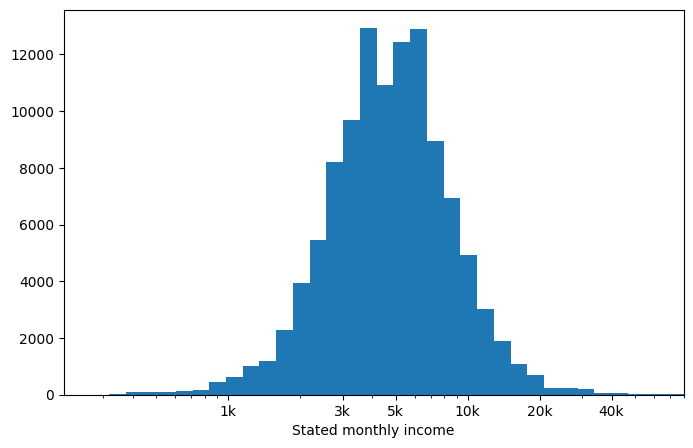

In [69]:
log_binsize = 0.07
# generates sequence of numbers on logarithmic scale
bins = 10 ** np.arange(2.5, np.log10(new_loan_data['StatedMonthlyIncome'].max())+log_binsize, log_binsize) #np.arange(start, stop, step)
plt.figure(figsize=[8,5])
plt.hist(data=new_loan_data, x='StatedMonthlyIncome', bins=bins)

# data will be displayed on logarthimic scale instead of linear scale
plt.xscale('log')
# at position 1000 on x-axis it display 1k...
plt.xticks([1000, 3000, 5000, 10000, 20000, 40000], ['1k', '3k', '5k', '10k', '20k', '40k'])
plt.xlim((0,80000))
plt.xlabel('Stated monthly income')
plt.show()

#### DebtToIncome Ratio

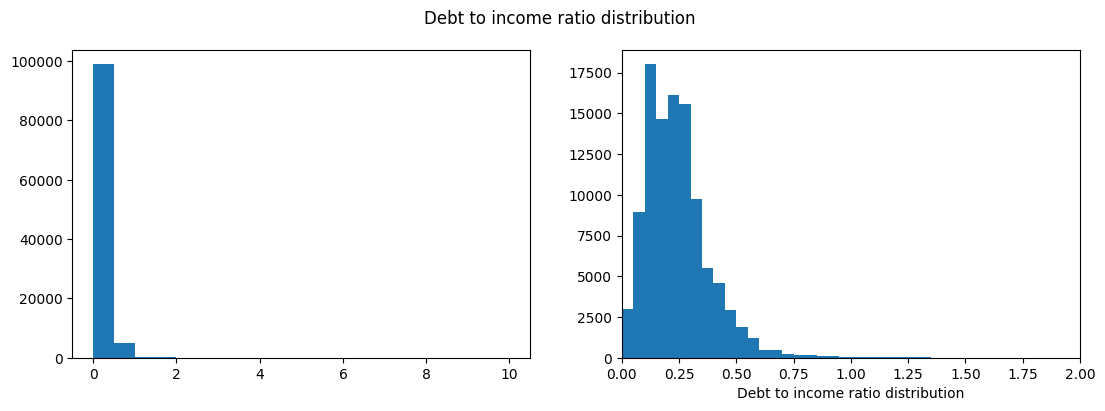

In [70]:
plt.figure(figsize=(13,4))
plt.suptitle("Debt to income ratio distribution")
plt.subplot(1,2,1)
bins = np.arange(0, 10.5, 0.5)
plt.hist(data=new_loan_data, x = 'DebtToIncomeRatio', bins=bins)
# plt.show()

plt.subplot(1,2,2)
bins = np.arange(0, 2.5, 0.05)
plt.hist(data=new_loan_data, x = 'DebtToIncomeRatio', bins=bins)
plt.xlim(0,2)
plt.xlabel("Debt to income ratio distribution")
plt.show()

Debt to income ratio is very right skewed with bulk of values around 0.2, we will perform logarthmic transformation to see distribution in detail.

C:\Users\hp\AppData\Local\Temp\ipykernel_16056\3430241738.py:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim((0,5))


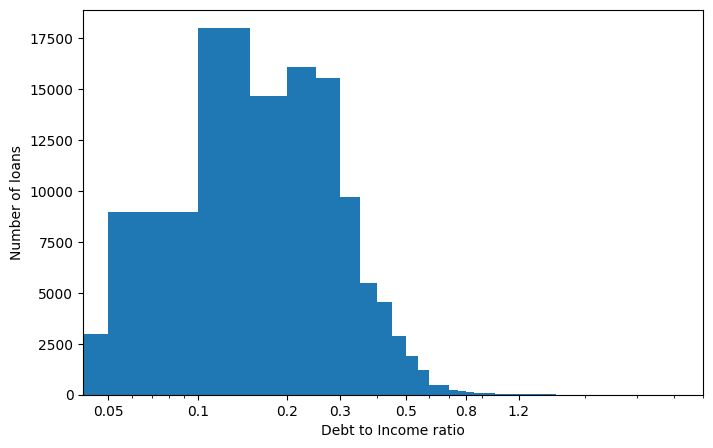

In [71]:
log_binsize = 0.05
aabins = 10 ** np.arange(-1.5, np.log10(new_loan_data['DebtToIncomeRatio'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = new_loan_data, x = 'DebtToIncomeRatio', bins = bins)
plt.xscale('log')
plt.xticks([0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1.2], [0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1.2])
plt.xlim((0,5))
plt.xlabel('Debt to Income ratio')
plt.ylabel('Number of loans')
plt.show()

#### EmploymentStatus
Its pretty interesting to see what is the distribution of borrowers according to empployment status.

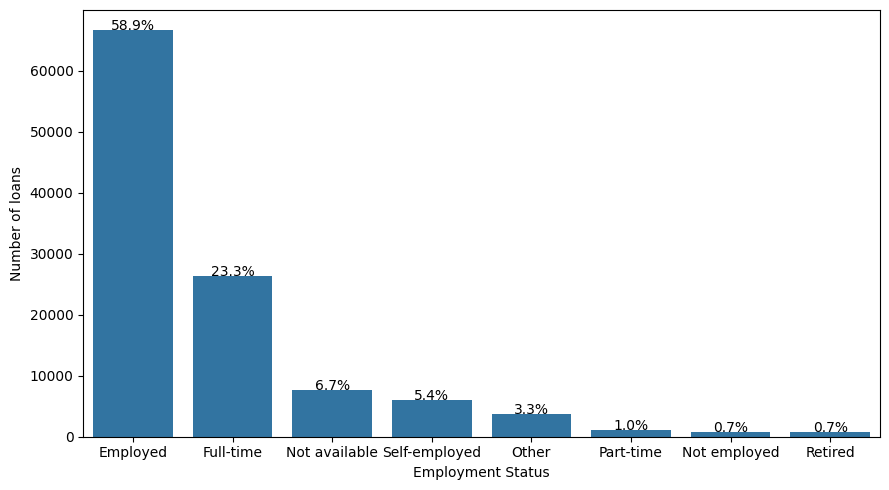

In [72]:
# sns.countplot(data=new_loan_data, x='EmploymentStatus')
# plt.xticks(rotation = 45)
# plt.show()
plt.figure(figsize=[9, 5])
status_counts = new_loan_data['EmploymentStatus'].value_counts()
status_order = status_counts.index
# max_count = status_counts[0]
# max_prop = max_count / new_loan_data.shape[0]
# tick_props = np.arange(0, max_prop, 0.1)
# tick_names = ['{:0.2f}'.format(v) for v in tick_props]

g = sns.countplot(data = new_loan_data, x = 'EmploymentStatus', color = base_color, order = status_order)
plt.xticks(rotation = 0)
plt.xlabel('Employment Status')
plt.ylabel('Number of loans')


# values must be ordered from the largest for this to work
for i in range(status_counts.shape[0]):
    count = status_counts[i]
    pct_string = '{:0.1f}%'.format(100 * count / new_loan_data.shape[0])
    plt.text(i, count+10, pct_string, ha = 'center')

plt.tight_layout();

Around 59% of borrowers are employed, despite being not employed and retired small fraction of people still able to borrow money.

### Bivaraite Analysis

In [73]:
numeric_vars = ['BorrowerAPR', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'CreditScoreRangeLower',
                'StatedMonthlyIncome', 'DebtToIncomeRatio', 'MonthsToClosed', 'Term']
bool_vars = ['LoanStatusActive', 'IncomeVerifiable', 'IsBorrowerHomeowner']
ordered_categoric_vars = ['IncomeRange', 'CreditRisk', 'CreditRating']
# new_loan_data.shape[0]
# new_loan_data.iloc[sample,:]

### Numerical Variables:

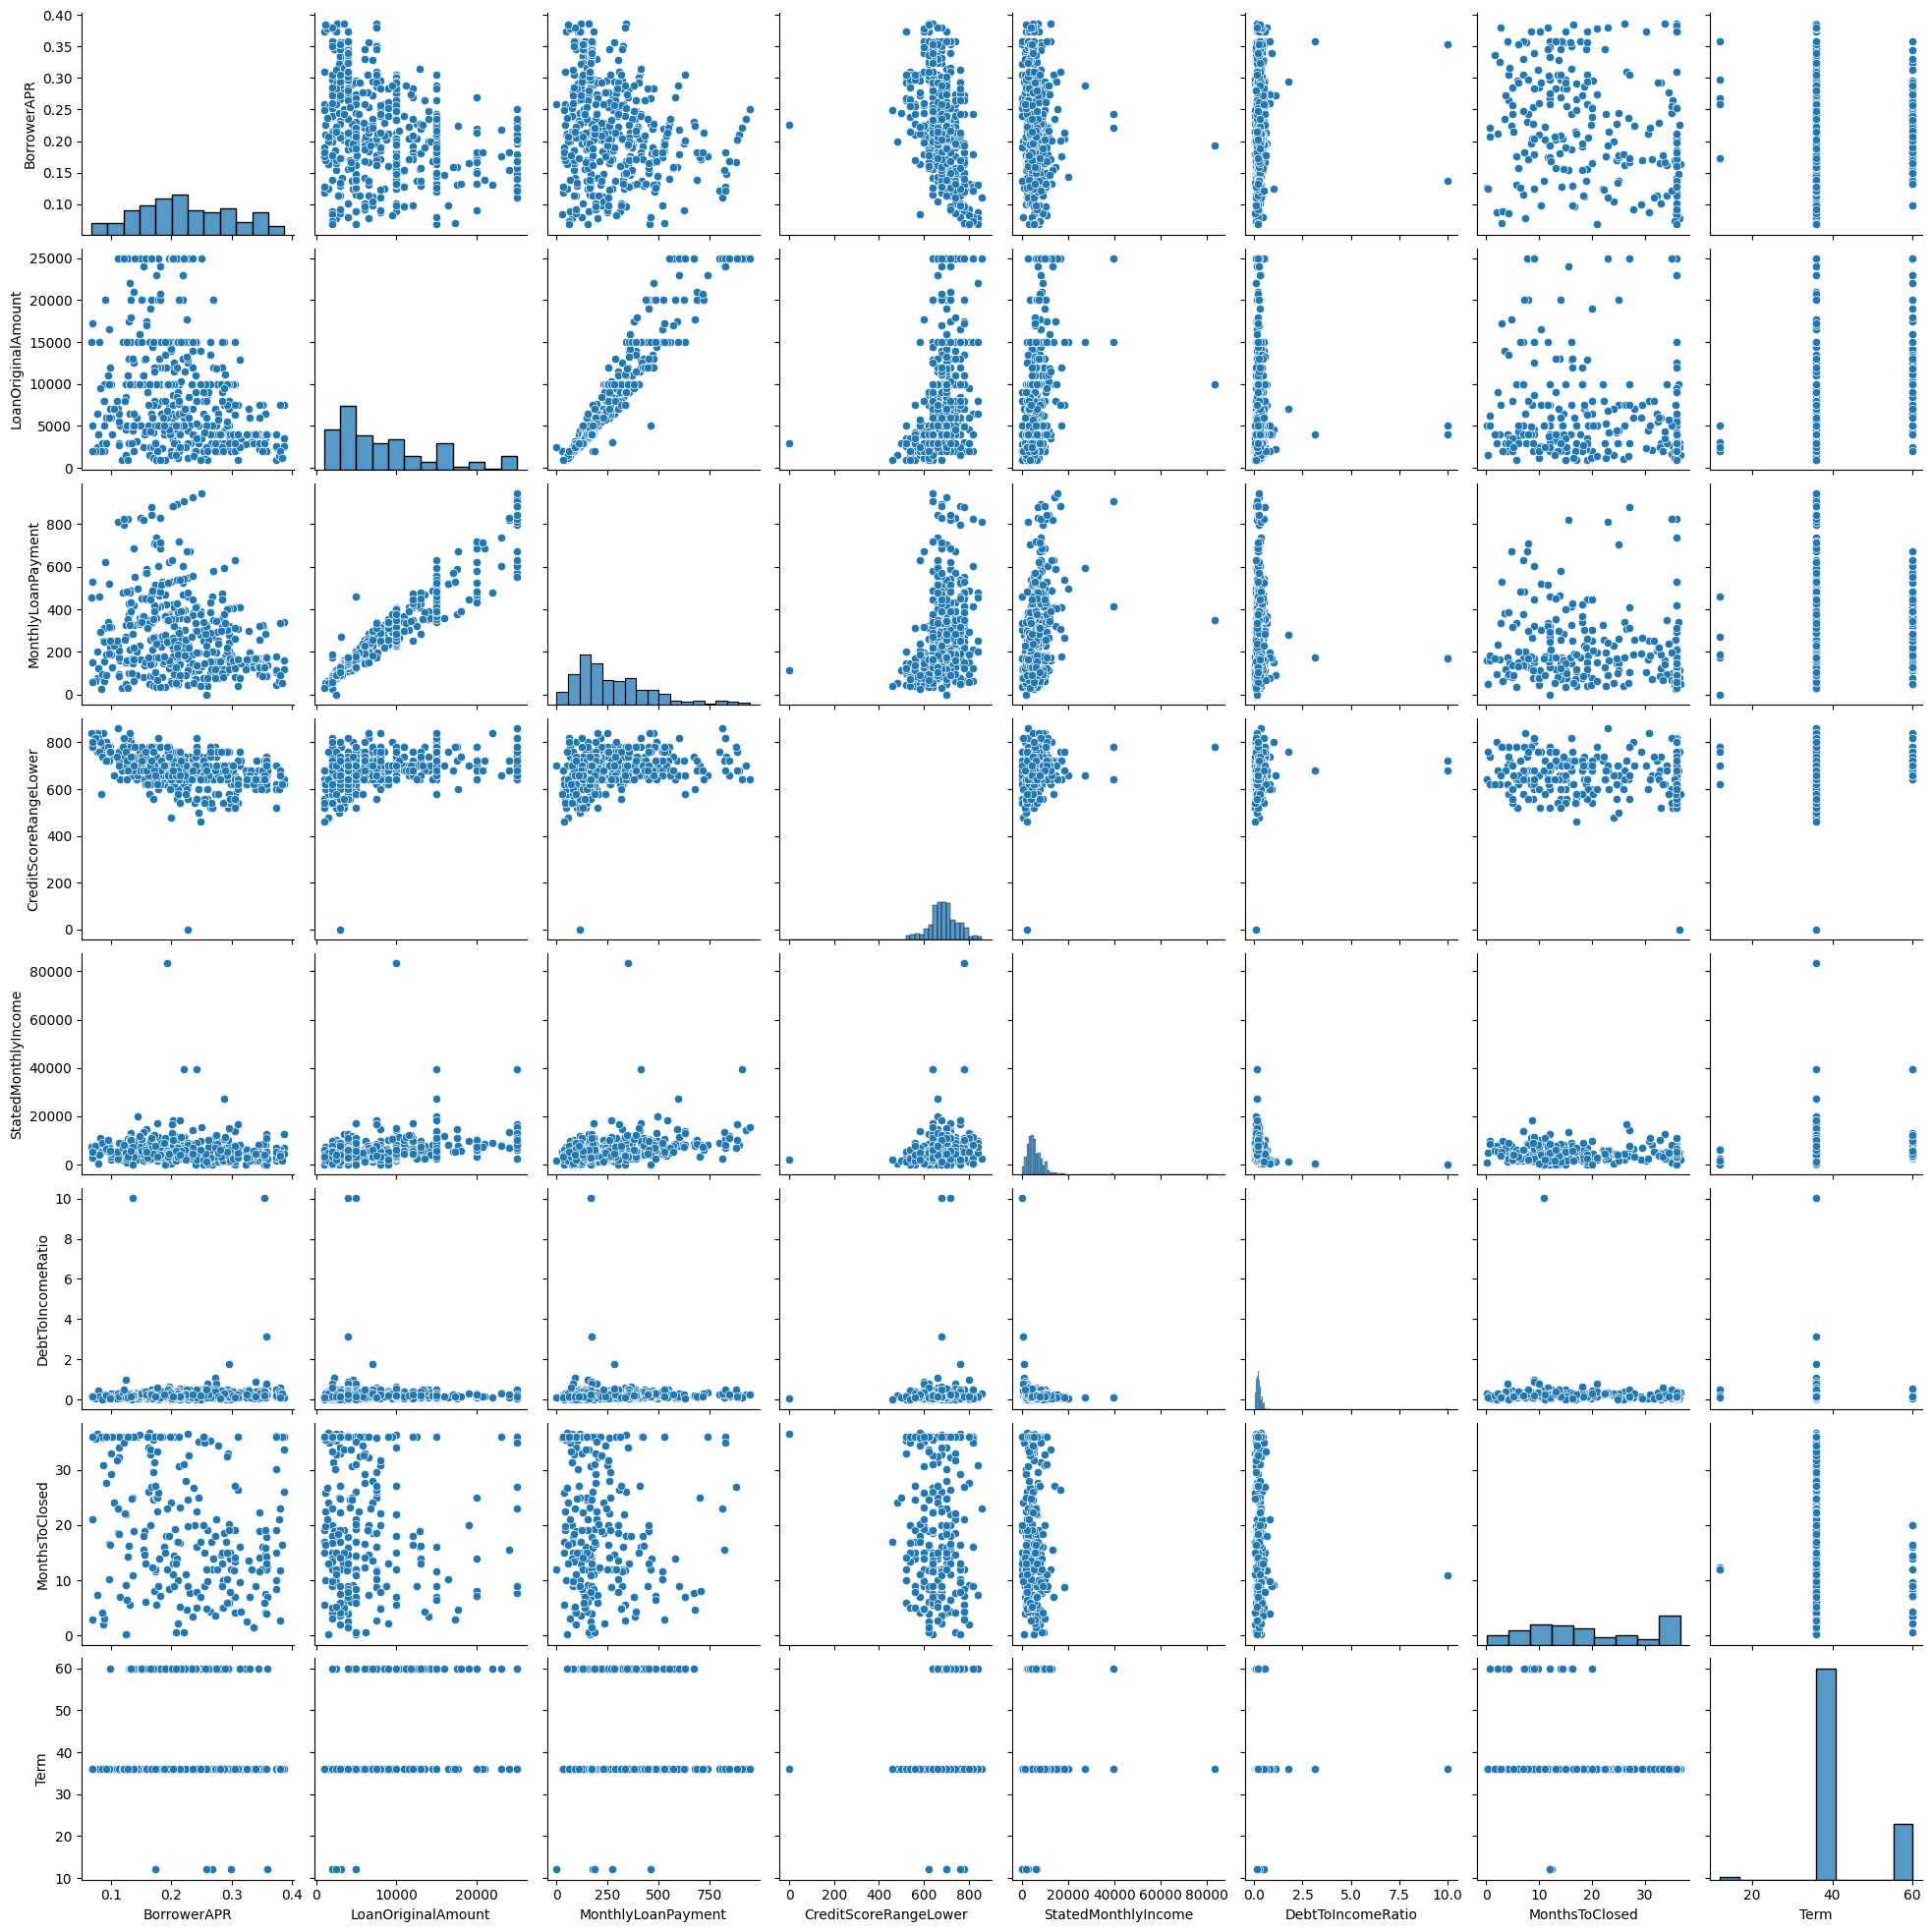

In [74]:
# pairplot of numeric vars to see relationships overview on a sample of data for faster rendering
sample = np.random.choice(new_loan_data.shape[0], 500, replace = False)
df_samp = new_loan_data.iloc[sample,:]
sns.pairplot(df_samp, vars = numeric_vars);

Upon Anlysis the data thoroughly I identified 3 parameters that can contribute to higher interest rates that are- a borrower’s Prosper score, the term, and status of a loan.

Compare borrower's rate with following:

- ProsperScore
- Term
- LoanStatus

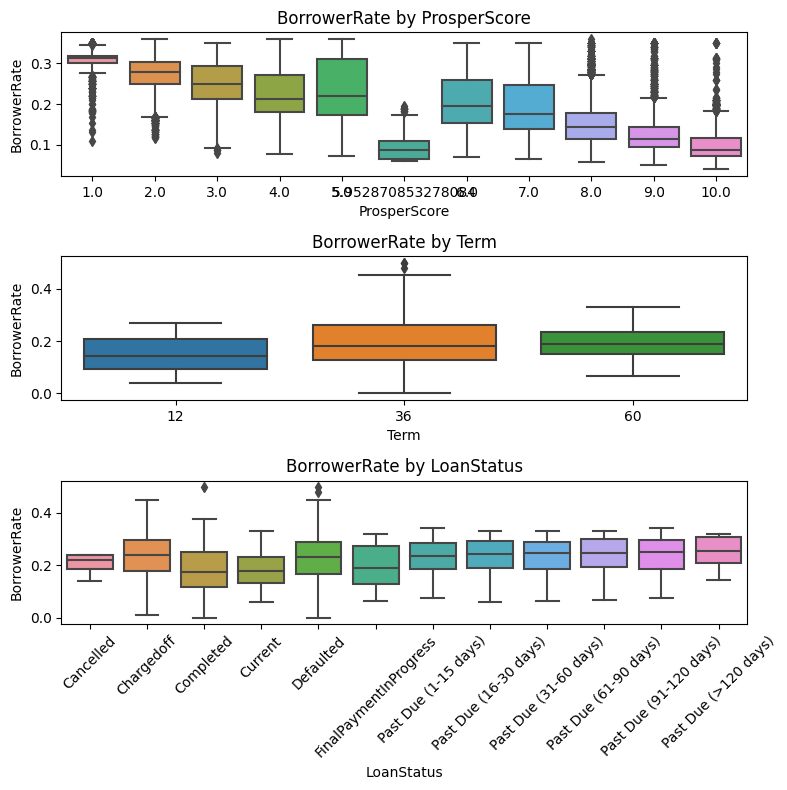

In [75]:
fig, ax = plt.subplots(nrows=3, figsize = [8,8])
# Interest Rate vs. Prosper Scores
sns.boxplot(data=new_loan_data, x='ProsperScore', y='BorrowerRate', ax=ax[0]);
ax[0].set_title('BorrowerRate by ProsperScore');


# Interest Rate vs. Terms
sns.boxplot(data=new_loan_data, x='Term', y='BorrowerRate', ax=ax[1]);
ax[1].set_title('BorrowerRate by Term')
plt.xticks(rotation=45);


# Interest Rate vs. Loan Status
sns.boxplot(data=new_loan_data, x='LoanStatus', y='BorrowerRate', ax=ax[2]);
ax[2].set_title('BorrowerRate by LoanStatus');
plt.xticks(rotation=45);

plt.tight_layout()
plt.show()

We can deduce following takeaways from above graph:
- The higher the Prosper score, the lower the interest rates.
- The longer a loan takes to be repaid, the higher the interest rates.
- The longer a loan passes its due date, the higher the interest rates.

Lets do it for binary variable (Homeowner) and see whats its relation with prosper score.

#### Prosper Score Vs IsBorrowerHomeOwner:

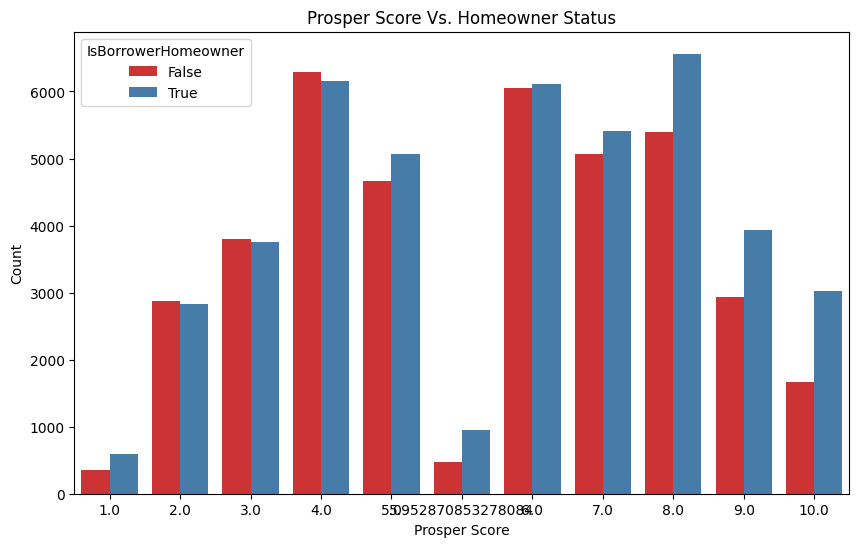

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ProsperScore', hue='IsBorrowerHomeowner', data=new_loan_data, palette='Set1')

plt.xlabel('Prosper Score')
plt.ylabel('Count')
plt.title('Prosper Score Vs. Homeowner Status')

plt.show()

The same trend goes for Homeowner, the higher the score, the more likely the borrower has a home.

#### ProsperScore Vs IncomeRange:

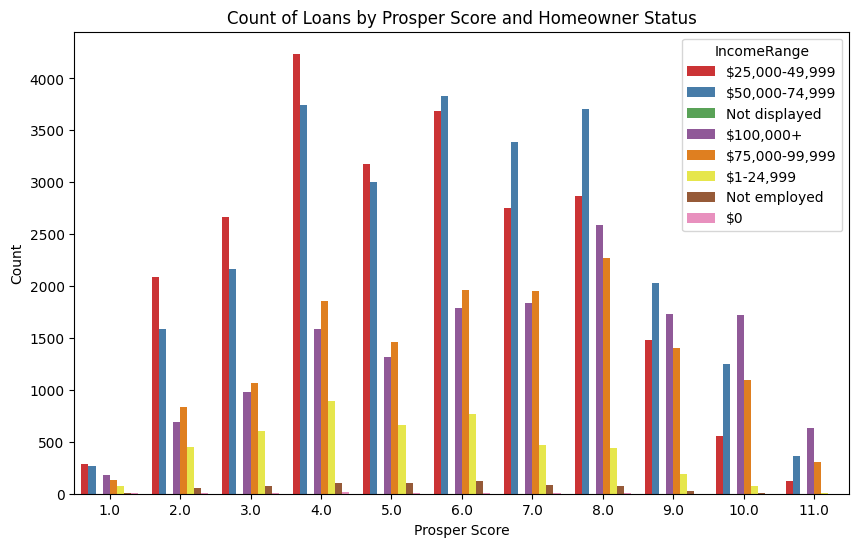

In [77]:
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.countplot(x='ProsperScore', hue='IncomeRange', data=loan_data, palette='Set1')

# Set labels and title
plt.xlabel('Prosper Score')
plt.ylabel('Count')
plt.title('Count of Loans by Prosper Score and Homeowner Status')
plt.show()

Same goes for Prosper Score and IncomeRange, as Prosper Score increases, the percentage of borrowers in the higher-income range also increases.

#### BorrowerRate Vs. IncomeRange & LoanStatus:

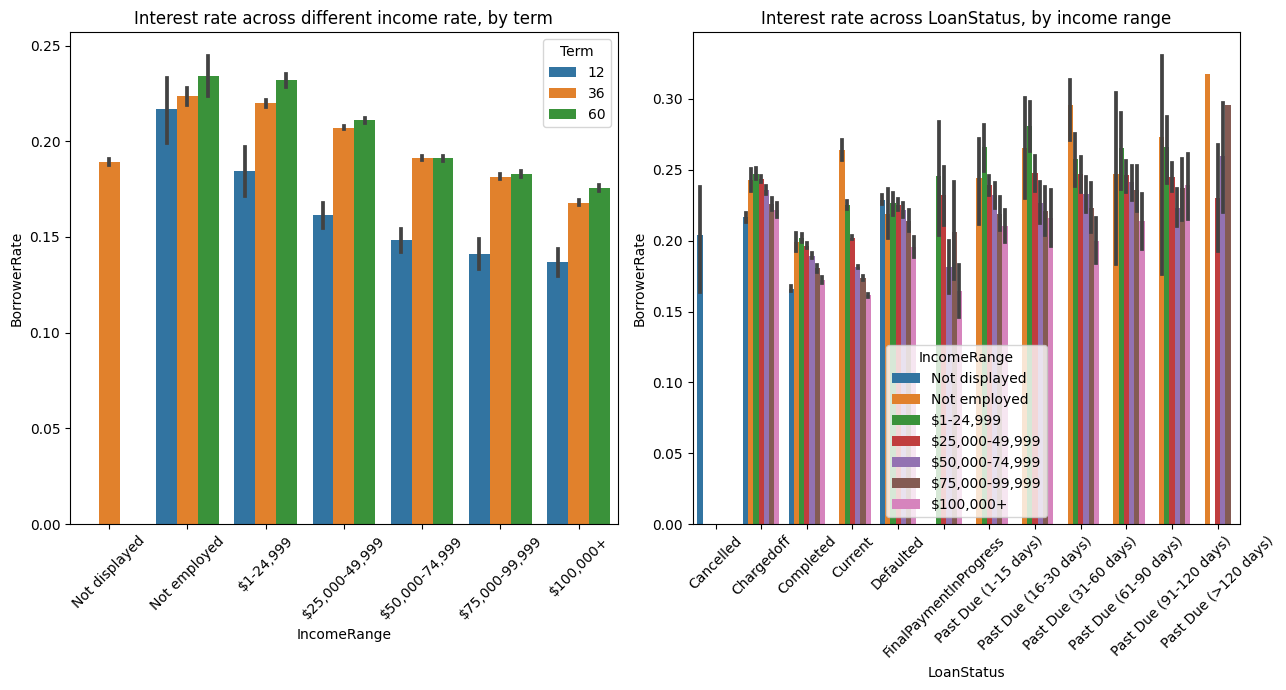

In [78]:
plt.figure(figsize=(13,7))
plt.subplot(1,2,1)
sns.barplot(data=new_loan_data, x='IncomeRange', y='BorrowerRate', hue = 'Term');
plt.title("Interest rate across different income rate, by term")
plt.xticks(rotation = 45)
# Interest Rate vs. Terms
plt.subplot(1,2,2)
sns.barplot(data=new_loan_data, x='LoanStatus', y='BorrowerRate', hue = 'IncomeRange');
plt.title("Interest rate across LoanStatus, by income range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph on the right suggests that as income ranges increase, interest rates generally decrease across different loan statuses. However, once a loan is in default or charged off, the interest rates tend to plateau at a similar level to that of past due loans, rather than continuing to increase.

#### Plotting correlation matrix:

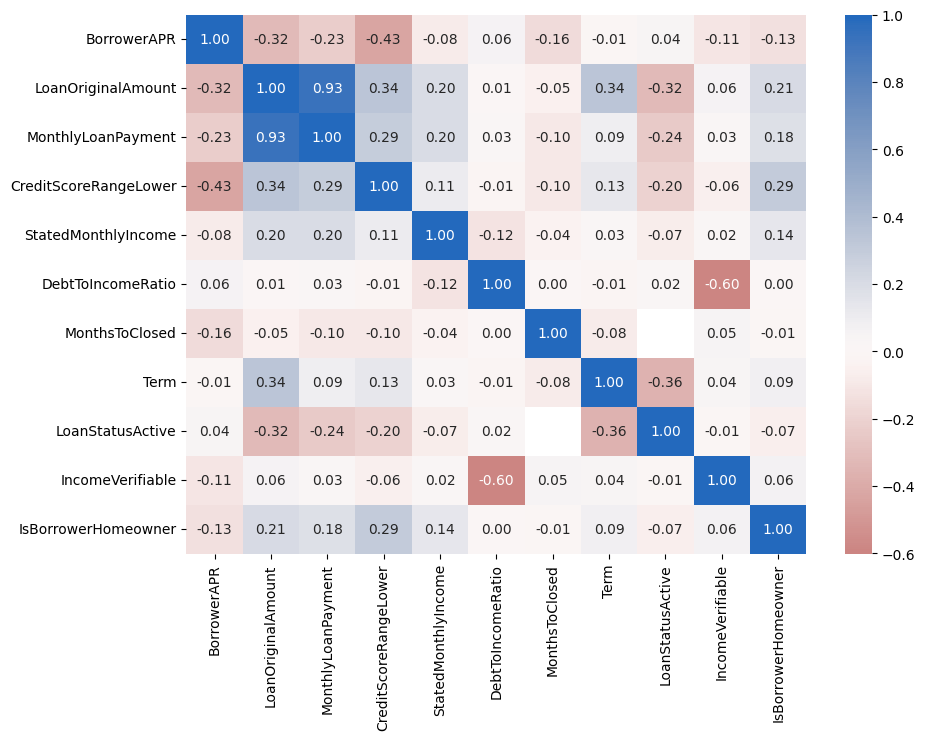

In [79]:
# correlations
plt.figure(figsize = [10, 7])
sns.heatmap(new_loan_data[['BorrowerAPR', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'CreditScoreRangeLower', 'StatedMonthlyIncome', \
              'DebtToIncomeRatio', 'MonthsToClosed', 'Term', 'LoanStatusActive', 'IncomeVerifiable', 'IsBorrowerHomeowner']]\
           .corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### BorrowerAPR & IncomeVerifiable
Does borrowers who have verified their income source have any advantage on interest rate.

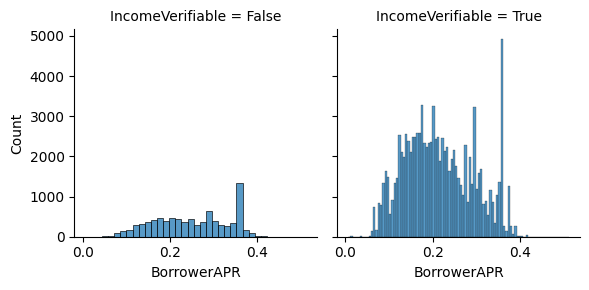

In [80]:
a = sns.FacetGrid(data= new_loan_data, col= 'IncomeVerifiable')
a.map(sns.histplot, 'BorrowerAPR');

Borrowers with Verifiable-income have benefit from lower rate.

#### IsBorrowerHomeowner & LoanOriginalAmount
Does borrowers who owned homes get higher loan amounts.

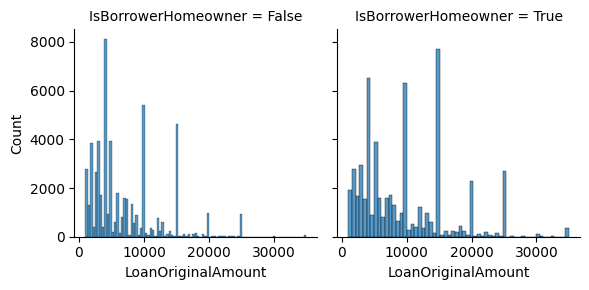

In [81]:
a = sns.FacetGrid(data=new_loan_data, col = 'IsBorrowerHomeowner')
a.map(sns.histplot, 'LoanOriginalAmount');

Borrowers who owns home gets higher loan amount.

#### Multivariate Exploration

### Some questions to answer

#### What are the most number of borrowers Credit Grade?

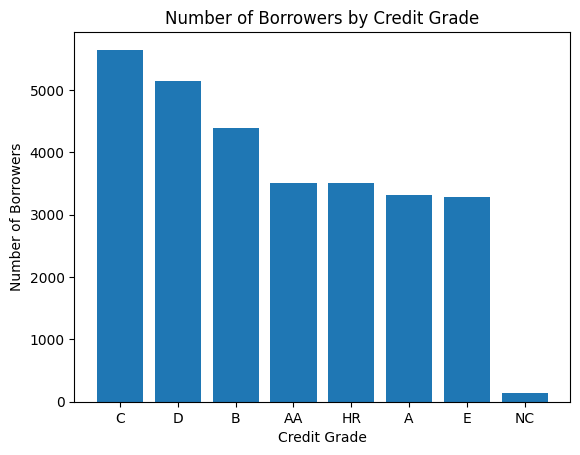

In [82]:
borrowers_by_grade = new_loan_data.CreditGrade.value_counts()
plt.bar(borrowers_by_grade.index, borrowers_by_grade.values)
plt.xlabel('Credit Grade')
plt.ylabel('Number of Borrowers')
plt.title('Number of Borrowers by Credit Grade')
plt.show()

#### Since there are so much low Credit Grade such as C and D , does it lead to a higher amount of deliquency???

This means borrowers with lower credit grades are considered to be at a higher risk of defaulting on their loans, which could lead to higher delinquency rates. In order to ascertain rate of deliquency, we will create another column by name "CreditRisk" to analyze the proportion of risk factor.

In [83]:
# create new variable CreditRating which combines the two rating columns
new_loan_data['CreditRisk'] = np.where(new_loan_data.CreditGrade.isin(['AA', 'A', 'B']), 'low',
                           np.where(new_loan_data.CreditGrade.isin(['C', 'D']), 'medium',
                                    np.where(new_loan_data.CreditGrade.isin(['E', 'HR', 'NC']), 'high', None)))

In [84]:
new_loan_data[['CreditRisk', 'CreditGrade']].head(10)

,CreditRisk,CreditGrade
0,medium,C
1,None,NaN
2,high,HR
3,None,NaN
4,None,NaN
5,None,NaN
6,None,NaN
7,None,NaN
8,None,NaN
10,None,NaN


In [85]:
# Convert CreditRisk as ordered categorical column
ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories= ['low', 'medium', 'high'])
new_loan_data['CreditRisk'] = new_loan_data['CreditRisk'].astype(ordered_var)

In [86]:
new_loan_data.CreditRisk.dtype

CategoricalDtype(categories=['low', 'medium', 'high'], ordered=True)

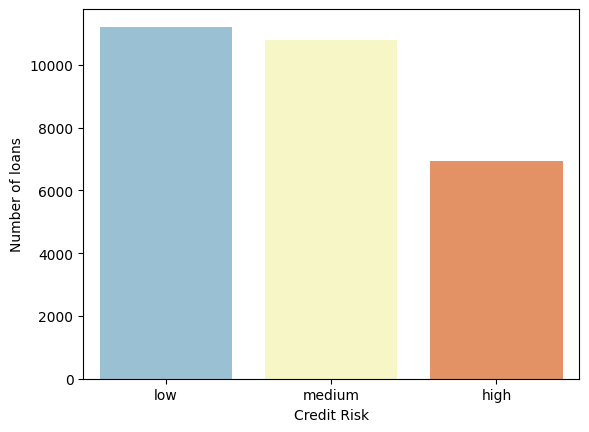

In [87]:
sns.countplot(data=new_loan_data, x= 'CreditRisk', palette="RdYlBu_r")
plt.xlabel('Credit Risk')
plt.ylabel('Number of loans');

There is risk of higher number of deliquent borrowers.

#### What is the highest number of BorrowerRate?

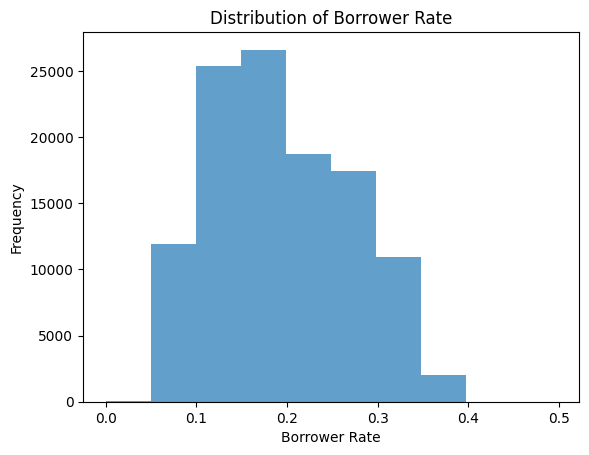

In [88]:
plt.hist(loan_data['BorrowerRate'], bins=10, alpha=0.7)
plt.xlabel('Borrower Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Borrower Rate')
plt.show();

The highest number of Borrower Rate is between 0.1 and 0.2

#### does the highest number of Lender Yield is same as BorrowerRate?

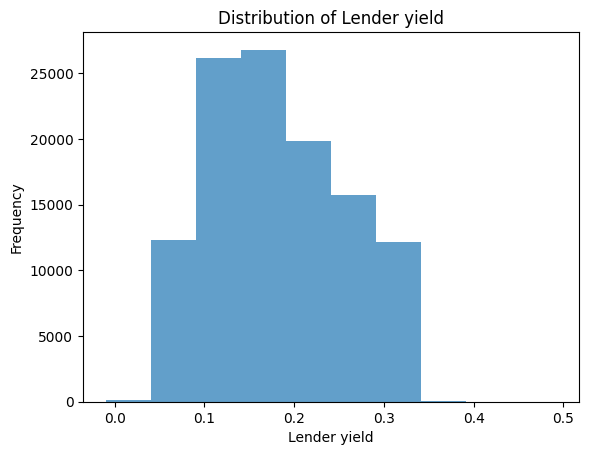

In [89]:
plt.hist(loan_data['LenderYield'], bins=10, alpha=0.7, label='Lender Yield')
plt.xlabel('Lender yield')
plt.ylabel('Frequency')
plt.title('Distribution of Lender yield')
plt.show();

#### Lets compare both of them in one go.

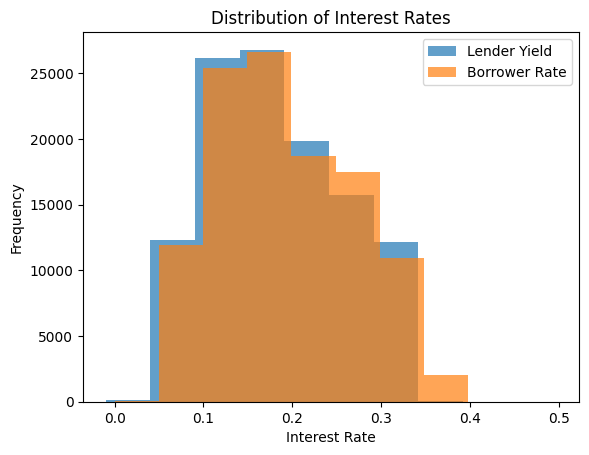

In [90]:
# Plot the data
plt.hist(loan_data['LenderYield'], bins=10, alpha=0.7, label='Lender Yield')
plt.hist(loan_data['BorrowerRate'], bins=10, alpha=0.7, label='Borrower Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Interest Rates')
plt.legend()
plt.show()

The majority of loans have interest between 0.1 and 0.2 for both borrower rates and Lender Yield.

#### Is the Credit Grade really accurate? Does higher Credit Grade leads to higher Monthly Loan Payment? As for Higher Credit Grade we mean from Grade AA to B???

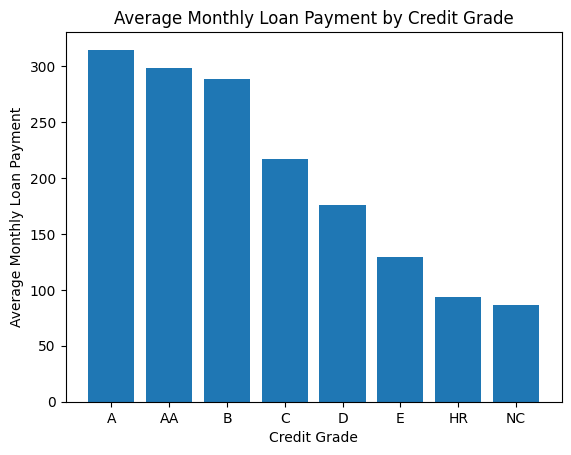

In [91]:
# Calculate average monthly loan payment by credit grade
avg_monthly_payment_by_grade = loan_data.groupby('CreditGrade')['MonthlyLoanPayment'].mean()
# Plot the data
plt.bar(avg_monthly_payment_by_grade.index, avg_monthly_payment_by_grade.values)
plt.xlabel('Credit Grade')
plt.ylabel('Average Monthly Loan Payment')
plt.title('Average Monthly Loan Payment by Credit Grade')
plt.show()

 We can observe the following:

- Borrowers with higher credit grades tend to have higher average monthly loan payments.
- As you move from lower credit grades (e.g., 'D') to higher credit grades (e.g., 'AA'), the average monthly payment generally increases.

This suggests a positive correlation between credit grade and average monthly loan payment, indicating that borrowers with higher credit grades tend to have higher monthly payments.



## Feature Engineering
#### Principal Component Analysis

Find lower number of variables and removes the least important variables from model, eventually will reduce model's complexity and removes noise from model. Eventually helps mitigate overfitting.
- 1st step: decorrelation
- 2nd step: reduce dimensions

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [132]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113066 non-null  object 
 1   ListingNumber                        113066 non-null  int64  
 2   ListingCreationDate                  113066 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113066 non-null  int64  
 5   LoanStatus                           113066 non-null  object 
 6   ClosedDate                           55076 non-null   object 
 7   BorrowerAPR                          113041 non-null  float64
 8   BorrowerRate                         113066 non-null  float64
 9   LenderYield                          113066 non-null  float64
 10  EstimatedEffectiveYield              83982 non-null   float64
 11  EstimatedLoss

Need to convert our target: LoanStatus column into binary 0/1 as we did before on newly created dataset: new_loan_data/

In [133]:
loan_data.loc[loan_data['ClosedDate'].isnull(), 'LoanStatusActive'] = "Active"
loan_data.loc[loan_data['ClosedDate'].notnull(), 'LoanStatusActive'] = "Not Active"
loan_data.LoanStatusActive.value_counts()

Active        57990
Not Active    55076
Name: LoanStatusActive, dtype: int64

In [134]:
loan_data['LoanStatusActive']  =le.fit_transform(loan_data['LoanStatusActive'])

In [140]:
selected_features = [col for col in loan_data.columns if loan_data[col].dtype == 'float64' or loan_data[col].dtype == 'int64'
                    or loan_data[col].dtype == 'int32']
selected_features

['ListingNumber',
 'Term',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'EmploymentStatusDuration',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'TradesOpenedLast6Months',
 'DebtToIncomeRatio',
 'StatedMonthlyIncome',
 'TotalProsperLoans',
 'TotalProsperPaymentsBilled',
 'OnTimeProsperPayments',
 'ProsperPaymentsLessThanOneMonthLate',
 'ProsperPaymentsOneMonthPlusLate',
 'ProsperPrincipalBorrowed',
 

In [144]:
for_PCA = loan_data[selected_features]
correlation = loan_data[selected_features].corr()

In [146]:
correlation.head()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanStatusActive
ListingNumber,1.000000,0.320191,-0.029314,-0.112241,-0.111384,-0.216325,-0.239349,-0.459091,0.209065,-0.106398,0.128971,0.157983,0.270609,0.270609,0.144986,0.195074,0.130910,0.231898,0.184495,-0.299328,-0.281114,-0.233141,-0.024522,-0.078699,-0.045629,-0.072768,0.057397,0.086107,0.036837,0.135312,0.254111,-0.085786,-0.041875,0.076209,0.176144,0.133513,0.133854,0.021698,-0.005401,0.252110,0.166288,-0.127443,-0.369560,-0.155062,-0.939083,0.995192,0.339750,0.276685,-0.377057,-0.363313,-0.276644,0.203554,0.103618,-0.250597,-0.246585,-0.095735,0.014031,-0.125503,-0.092433,-0.053279,-0.277339,-0.761863
Term,0.320191,1.000000,-0.010810,0.020376,0.020849,0.057197,-0.108414,0.154055,0.080679,0.028256,0.005479,0.083015,0.126542,0.126542,0.076848,0.096076,0.076682,0.093706,0.084200,-0.113608,-0.103500,-0.083719,-0.016769,-0.041458,-0.029339,-0.026096,0.026310,0.031624,0.015552,0.079884,0.119068,-0.029865,-0.014776,0.028531,0.070298,0.002061,0.002674,-0.002390,-0.008492,0.130440,0.153419,-0.048225,-0.133945,-0.070819,-0.342369,0.335960,0.339283,0.091480,-0.068166,-0.127220,0.161609,-0.170285,0.035649,-0.037718,-0.035344,-0.034074,-0.029188,-0.056543,-0.043445,-0.024438,-0.044565,-0.360863
BorrowerAPR,-0.029314,-0.010810,1.000000,0.989817,0.989319,0.894989,0.949343,0.793796,-0.962202,-0.669848,0.132600,-0.008242,-0.429289,-0.429289,-0.093115,-0.098501,0.002904,-0.110053,-0.043206,0.145633,0.114295,0.149254,0.065815,0.161971,0.122393,0.043943,-0.058547,0.261703,-0.349179,-0.041489,-0.240614,0.103306,0.056200,-0.082058,-0.041426,0.031448,0.018680,0.091063,0.055269,-0.205749,-0.091747,-0.231885,0.087651,-0.185956,-0.076136,-0.033780,-0.322323,-0.225951,-0.113240,-0.182399,0.168936,0.118539,-0.041308,0.066924,0.067016,0.028414,-0.028152,-0.044564,-0.047062,-0.032024,-0.309448,0.038944
BorrowerRate,-0.112241,0.020376,0.989817,1.000000,0.999207,0.894608,0.945047,0.817298,-0.953102,-0.651294,0.102852,-0.019629,-0.461342,-0.461342,-0.097062,-0.105601,-0.005432,-0.125810,-0.055463,0.183392,0.152977,0.176404,0.065755,0.170098,0.127974,0.051005,-0.059592,0.255850,-0.344172,-0.047826,-0.260499,0.114408,0.062807,-0.088722,-0.049230,0.019206,0.006981,0.085803,0.050685,-0.205973,-0.087122,-0.217061,0.135846,-0.172936,0.018111,-0.116321,-0.328339,-0.243964,-0.083197,-0.155920,0.199473,0.097843,-0.053204,0.100209,0.099890,0.041944,-0.028906,-0.030953,-0.037653,-0.026716,-0.276258,0.097333
LenderYield,-0.111384,0.020849,0.989319,0.999207,1.000000,0.894669,0.945059,0.817282,-0.953116,-0.651342,0.104341,-0.018668,-0.454100,-0.454100,-0.095900,-0.104385,-0.005106,-0.124423,-0.054548,0.180053,0.149752,0.171712,0.065127,0.167804,0.126048,0.049716,-0.058643,0.254111,-0.3412

As we can see in the above output, there are many features that have very high correlations among themselves. This is the motivation behind performing Principal Component Analysis (PCA) in the further step to reduce the dimensions.

In [183]:
for_PCA.head()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanStatusActive
0,193129,36,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,0,2.0,640.0,659.0,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,3083.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,1
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,2,44.0,680.0,699.0,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,6125.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,0
2,81716,36,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,0,NaN,480.0,499.0,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,2083.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,1
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,16,113.0,800.0,819.0,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,2875.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,0
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,2,44.0,680.0,699.0,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,9583.333333,1.0,11.0,11.0,0.0,0.0,11000.0,9947.9,NaN,0,NaN,6,102670,15000,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,0


### Missing Values

In [190]:
# missing = loan_data.isnull().sum()
# missing = pd.DataFrame(missing[missing!=0])
# missing.columns = ['No. of missing values']
# missing['Percentage'] = 100*missing['No. of missing values']/loan_data.count()
# missing.sort_values(by="Percentage", ascending=False)

In [192]:
# X_train = X_train.fillna(X_train.mean())
# X_test = X_test.fillna(X_train.mean())
# t = t.fillna(X_train.mean())
# [X_train.isnull().sum().sum(), X_test.isnull().sum().sum(), t.isnull().sum().sum()]

### Train test split
Before we go for data transformation and model building, it is necessary to divide the data into train and test.

In [174]:
X = for_PCA.iloc[:, 1:61].copy()
y = for_PCA.iloc[:, 61].copy()
y.value_counts()

0    57990
1    55076
Name: LoanStatusActive, dtype: int64

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state= 42)

In [193]:
# [X_train.shape, X_test.shape, y_train.shape, y_test.shape]
[X_train.shape, X_test.shape, y_train.shape, y_test.shape]

[(79146, 60), (33920, 60), (79146,), (33920,)]

In [194]:
X_train[np.isnan(X_train)] = np.nanmean(X_train)
X_test[np.isnan(X_test)] = np.nanmean(X_test)

### Standardization of Variables 
PCA is effected by scale so we need to scale the features in the data before applying PCA. We can transform the data onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. StandardScaler helps standardize the dataset’s features.

In [195]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
# X_t = scalar.transform(t)

In [167]:
for_PCA.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanStatusActive
count,1.130660e+05,113066.000000,113041.000000,113066.000000,113066.000000,83982.000000,83982.000000,83982.000000,83982.000000,83982.000000,113066.000000,105441.000000,112475.000000,112475.000000,105462.000000,105462.000000,112369.000000,113066.000000,113066.000000,112369.000000,111907.000000,112369.000000,105444.000000,112076.000000,112369.000000,105462.000000,1.054620e+05,105462.000000,105522.000000,105522.000000,105522.000000,105522.000000,104594.000000,1.130660e+05,21923.000000,21923.000000,21923.000000,21923.000000,21923.000000,21923.000000,21923.000000,18912.000000,113066.000000,16952.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000
mean,6.248036e+05,40.800170,0.218980,0.192946,0.182882,0.168870,0.080417,0.096246,4.068705,5.952871,2.776838,96.060584,685.524961,704.524961,10.307058,9.248336,26.746380,6.959466,397.820998,1.438600,5.590812,0.595129,986.818434,4.158892,0.312764,0.015209,1.759230e+04,0.561088,11208.182028,23.221518,0.885552,0.802089,0.276032,5.605120e+03,1.420472,22.932263,22.269033,0.614514,0.048488,8452.830631,2929.190167,-3.229537,153.991403,16.268464,32.121770,69044.527992,8314.762307,271.932742,4209.236052,3125.487227,1083.748825,-55.019639,-14.350991,705.842206,686.669798,25.336372,0.998573,0.048379,0.023641,16.678249,80.876143,0.487114
std,3.273262e+05,10.421518,0.080483,0.074917,0.074612,0.068607,0.046851,0.030475,1.675442,2.373897,3.998188,94.432241,66.635895,66.635895,5.458196,5.021249,13.643731,4.629303,447.657266,2.444093,6.446342,1.984234,7156.683653,10.163465,0.728792,0.154691,3.294590e+04,0.318189,19847.681185,11.875303,0.148428,1.097975,0.553738,7.495596e+03,0.763711,19.248708,18.828595,2.446576,0.557171,7389.362099,3804.772154,50.063023,467.919931,9.005898,29.978915,38800.158867,6237.007841,192.549979,4798.081994,4076.877459,1185.533024,60.794092,109.645216,2396.901814,2365.467115,276.708803,0.017987,0.333580,0.233296,295.674170,103.340277,0.499836
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.000000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000

- Given a collection of points in two, three, or higher dimensional space, a "best fitting" line can be defined as one that minimizes the average squared distance from a point to the line. The next best-fitting line can be similarly chosen from directions perpendicular to the first. Repeating this process yields an orthogonal basis in which different individual dimensions of the data are uncorrelated. These basis vectors are called principal components, and several related procedures principal component analysis (PCA).
- PCA is a method used to reduce number of variables in the data by extracting the important ones from a large pool. It reduces the dimension of the data with an aim to retain as much information as possible. In other words, this method combines highly correlated variables together to form a smaller number of an artificial set of variables which is called “principal components” that account for most variance in the data.

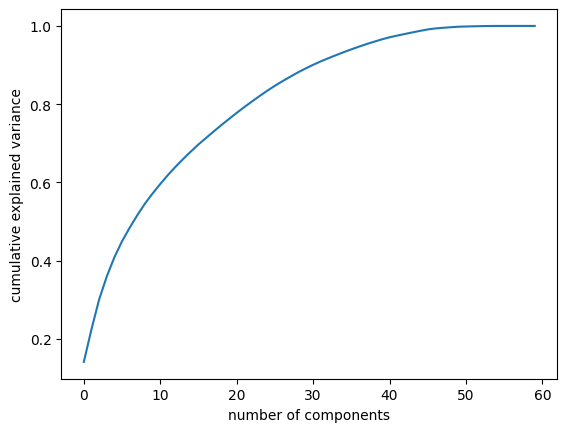

In [196]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [207]:
np.cumsum(pca.explained_variance_ratio_)[42]


0.9793965459227799

97% of variation is explained by 100 components.

In [211]:
for_PCA.shape

(113066, 62)

In [215]:
# # correlations
# plt.figure(figsize = [10, 7])
# sns.heatmap(for_PCA[selected_features].corr().head(), annot = True, fmt = '.2f',
#            cmap = 'vlag_r', center = 0)
# plt.show()

In [2]:
# final_pca = PCA(n_components=200)
# final_pca.fit(X_train)
# X_train = final_pca.transform(X_train)
# X_train = pd.DataFrame(data = X_train)
# X_test = final_pca.transform(X_test)
# X_test = pd.DataFrame(data = X_test)
# X_t = final_pca.transform(X_t)
# X_t = pd.DataFrame(data = X_t)

Now we can use these variables to fit the model with 200 independent variables to predict loss.

In [1]:
# plt.figure(figsize=(20,10))
# for index,col in enumerate(categorical_feature, start=1):
#     plt.subplot(2,4,index)
#     plot_frequency_sns(data=data_all, feature_name=col, hue='Loan_Status', annotate=True, annotate_distance=5, annotate_rotation='horizontal', palette='Blues')
#     plt.legend(['Loan Dis-approved','Loan Approved']);
# plt.tight_layout()
# pl